<a href="https://colab.research.google.com/github/Juanacalcabrini/datos_juana/blob/main/TRABAJO_FINAL_ANALISIS_DE_DATOS_JUANA_CALCABRINI_ENFERMEDADES_CARDIACAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como afectan los factores clinicos en las enfermedades cardiacas y sus posteriores intervenciones quirurgicas

elegi este conjunto de datos ya que yo quiero ahcer una investigacion y publicar un papper al respecto de como modificacndo esos factores clinicos reducimos las intervenciones quirurgicas y la importancia de la prevencion primaria.


# CARGA DE DATOS

Para cargar el conjunto de datos en Google Colab usando el código que  me  proporcionaron, necesito instalar el paquete ucimlrepo, que no viene instalado por defecto. A continuación lo instalare

In [2]:
!pip install ucimlrepo


In [3]:
import pandas as pd

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# prompt: cargar un set de datos

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convertimos X e Y a DataFrames de Pandas:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

#Renombramos la columna y
y = y.rename(columns={y.columns[0]: 'target'})

#Combinamos X e Y en un único DataFrame

dataFrame = pd.concat([X, y], axis=1)

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

una vez car gado el set de datos debo analizarlo y limpiarlo
las columnas me dan la informacion de
edad
sexo
colesterol
fbs(prueba de azucar en ayunas)
thalach(electrocardiograma)
thalach (frecuencia cardiaca maxima)
exang (ejercicio que induce angina)
oldpeak (depresión del ST inducida por el ejercicio)
thal (numero de vasos principales afectados
num (pacientes con dx de enfermedad cardiaca )

# LIMPIEZA DE DATOS Y ANALISIS DESCRIPTIVO

EN BASE A ESTO VOY A COMENZAR CON LA LIMPIEZA DE LOS DATOS


In [6]:
dataFrame.duplicated().sum()

0

In [7]:
print(dataFrame.isnull().sum())
dataFrame.dropna(inplace=True)
print(dataFrame.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


HASTA ACA NO HAY VALORES NULOS


In [8]:
#Identificar cuartiles

Q1 = dataFrame['age'].quantile(0.25)
Q2 = dataFrame['age'].quantile(0.50)
Q3 = dataFrame['age'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['age'] < (Q1 - 1.5 * IQR)) | (dataFrame['age'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (age): {Q1}")
print(f"Q2 (Mediana, age): {Q2}")
print(f"Q3 (age): {Q3}")

Q1 (age): 48.0
Q2 (Mediana, age): 56.0
Q3 (age): 61.0


In [9]:
#Identificar cuartiles

Q1 = dataFrame['sex'].quantile(0.25)
Q2 = dataFrame['sex'].quantile(0.50)
Q3 = dataFrame['sex'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['sex'] < (Q1 - 1.5 * IQR)) | (dataFrame['sex'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (sex): {Q1}")
print(f"Q2 (Mediana, sex): {Q2}")
print(f"Q3 (sex): {Q3}")

Q1 (sex): 0.0
Q2 (Mediana, sex): 1.0
Q3 (sex): 1.0


In [10]:
#Identificar cuartiles

Q1 = dataFrame['chol'].quantile(0.25)
Q2 = dataFrame['chol'].quantile(0.50)
Q3 = dataFrame['chol'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['chol'] < (Q1 - 1.5 * IQR)) | (dataFrame['chol'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (chol): {Q1}")
print(f"Q2 (Mediana, chol): {Q2}")
print(f"Q3 (chol): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['chol'] < (Q1 - 1.5 * IQR)) | (dataFrame['chol'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (chol): {Q1}")
print(f"Q2 (Mediana, chol): {Q2}")
print(f"Q3 (chol): {Q3}")

Q1 (chol): 211.0
Q2 (Mediana, chol): 243.0
Q3 (chol): 276.0
Q1 (chol): 211.0
Q2 (Mediana, chol): 243.0
Q3 (chol): 276.0


In [12]:
Q1 = dataFrame['trestbps'].quantile(0.25)
Q2 = dataFrame['trestbps'].quantile(0.50)
Q3 = dataFrame['trestbps'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['trestbps'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (trestbps): {Q1}")
print(f"Q2 (Mediana, trestbps): {Q2}")
print(f"Q3 (trestbps): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['trestbps'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (trestbps): {Q1}")
print(f"Q2 (Mediana, trestbps): {Q2}")
print(f"Q3 (trestbps): {Q3}")

Q1 (trestbps): 120.0
Q2 (Mediana, trestbps): 130.0
Q3 (trestbps): 140.0
Q1 (trestbps): 120.0
Q2 (Mediana, trestbps): 130.0
Q3 (trestbps): 140.0


In [13]:
Q1 = dataFrame['ca'].quantile(0.25)
Q2 = dataFrame['ca'].quantile(0.50)
Q3 = dataFrame['ca'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['ca'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (ca): {Q1}")
print(f"Q2 (Mediana, ca): {Q2}")
print(f"Q3 (ca): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['ca'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (ca): {Q1}")
print(f"Q2 (Mediana, ca): {Q2}")
print(f"Q3 (ca): {Q3}")

Q1 (ca): 0.0
Q2 (Mediana, ca): 0.0
Q3 (ca): 1.0
Q1 (ca): 0.0
Q2 (Mediana, ca): 0.0
Q3 (ca): 1.0


In [14]:
Q1 = dataFrame['slope'].quantile(0.25)
Q2 = dataFrame['slope'].quantile(0.50)
Q3 = dataFrame['slope'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['slope'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (slope): {Q1}")
print(f"Q2 (Mediana, slope): {Q2}")
print(f"Q3 (slope): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['slope'] < (Q1 - 1.5 * IQR)) | (dataFrame['fbs'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (slope): {Q1}")
print(f"Q2 (Mediana, slope): {Q2}")
print(f"Q3 (slope): {Q3}")

Q1 (slope): 1.0
Q2 (Mediana, slope): 2.0
Q3 (slope): 2.0
Q1 (slope): 1.0
Q2 (Mediana, slope): 2.0
Q3 (slope): 2.0


In [15]:
Q1 = dataFrame['thal'].quantile(0.25)
Q2 = dataFrame['thal'].quantile(0.50)
Q3 = dataFrame['thal'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['thal'] < (Q1 - 1.5 * IQR)) | (dataFrame['thal'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (thal): {Q1}")
print(f"Q2 (Mediana, thal): {Q2}")
print(f"Q3 (thal): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['thal'] < (Q1 - 1.5 * IQR)) | (dataFrame['thal'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (thal): {Q1}")
print(f"Q2 (Mediana, thal): {Q2}")
print(f"Q3 (thal): {Q3}")

Q1 (thal): 3.0
Q2 (Mediana, thal): 3.0
Q3 (thal): 7.0
Q1 (thal): 3.0
Q2 (Mediana, thal): 3.0
Q3 (thal): 7.0


In [16]:
Q1 = dataFrame['oldpeak'].quantile(0.25)
Q2 = dataFrame['oldpeak'].quantile(0.50)
Q3 = dataFrame['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['oldpeak'] < (Q1 - 1.5 * IQR)) | (dataFrame['oldpeak'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (oldpeak): {Q1}")
print(f"Q2 (Mediana, oldpeak): {Q2}")
print(f"Q3 (oldpeak): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['oldpeak'] < (Q1 - 1.5 * IQR)) | (dataFrame['oldpeak'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (oldpeak): {Q1}")
print(f"Q2 (Mediana, oldpeak): {Q2}")
print(f"Q3 (oldpeak): {Q3}")

Q1 (oldpeak): 0.0
Q2 (Mediana, oldpeak): 0.8
Q3 (oldpeak): 1.6
Q1 (oldpeak): 0.0
Q2 (Mediana, oldpeak): 0.8
Q3 (oldpeak): 1.6


In [17]:
Q1 = dataFrame['thalach'].quantile(0.25)
Q2 = dataFrame['thalach'].quantile(0.50)
Q3 = dataFrame['thalach'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['thalach'] < (Q1 - 1.5 * IQR)) | (dataFrame['thalach'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (thalach): {Q1}")
print(f"Q2 (Mediana, thalach): {Q2}")
print(f"Q3 (thaach): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['thalach'] < (Q1 - 1.5 * IQR)) | (dataFrame['thalach'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (thalach): {Q1}")
print(f"Q2 (Mediana, thalach): {Q2}")
print(f"Q3 (thalach): {Q3}")

Q1 (thalach): 133.0
Q2 (Mediana, thalach): 153.0
Q3 (thaach): 166.0
Q1 (thalach): 133.0
Q2 (Mediana, thalach): 153.0
Q3 (thalach): 166.0


In [18]:
Q1 = dataFrame['exang'].quantile(0.25)
Q2 = dataFrame['exang'].quantile(0.50)
Q3 = dataFrame['exang'].quantile(0.75)
IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['exang'] < (Q1 - 1.5 * IQR)) | (dataFrame['exang'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (exang): {Q1}")
print(f"Q2 (Mediana, exang): {Q2}")
print(f"Q3 (exang): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['exang'] < (Q1 - 1.5 * IQR)) | (dataFrame['exang'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (exang): {Q1}")
print(f"Q2 (Mediana, exang): {Q2}")
print(f"Q3 (exang): {Q3}")

print(f"Q1 (exang): {Q1}")
print(f"Q2 (Mediana, exang): {Q2}")
print(f"Q3 (exang): {Q3}")

IQR = Q3 - Q1
cuartil = dataFrame[(dataFrame['exang'] < (Q1 - 1.5 * IQR)) | (dataFrame['exang'] > (Q3 + 1.5 * IQR))]
print(f"Q1 (exang): {Q1}")
print(f"Q2 (Mediana, exang): {Q2}")
print(f"Q3 (exang): {Q3}")

Q1 (exang): 0.0
Q2 (Mediana, exang): 0.0
Q3 (exang): 1.0
Q1 (exang): 0.0
Q2 (Mediana, exang): 0.0
Q3 (exang): 1.0
Q1 (exang): 0.0
Q2 (Mediana, exang): 0.0
Q3 (exang): 1.0
Q1 (exang): 0.0
Q2 (Mediana, exang): 0.0
Q3 (exang): 1.0


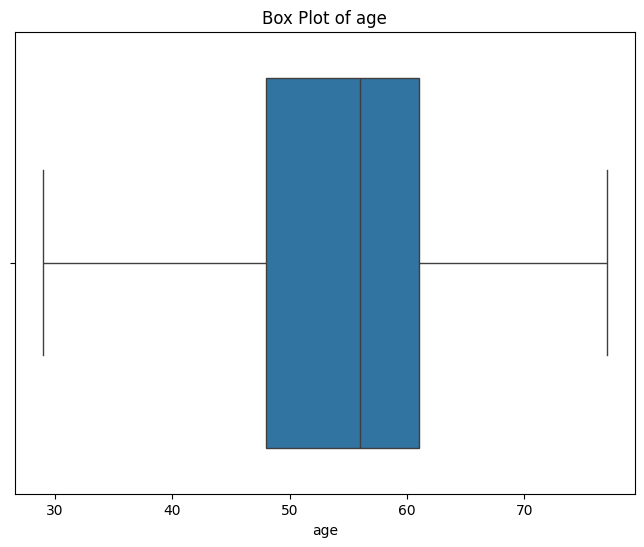

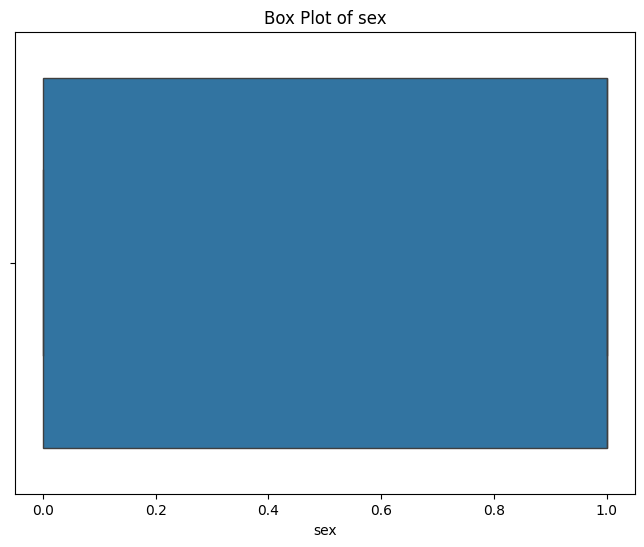

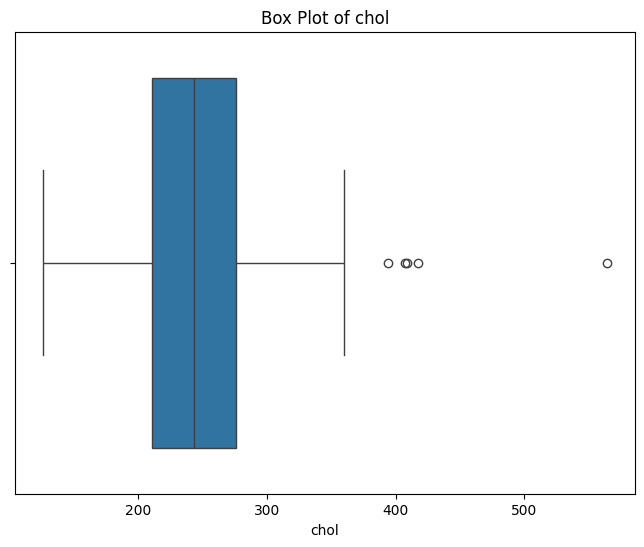

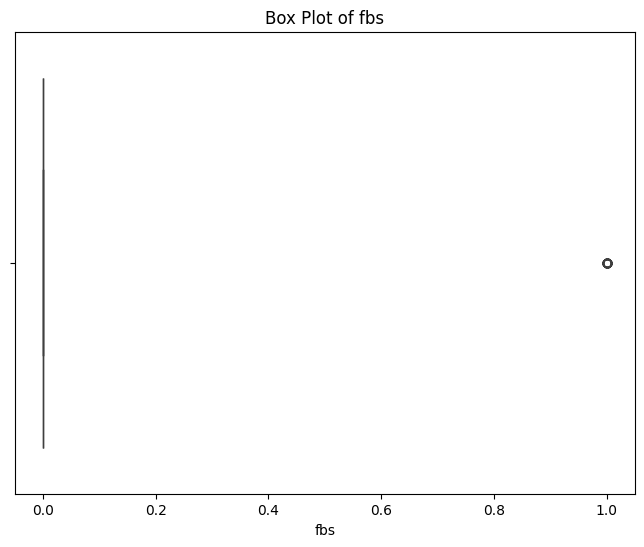

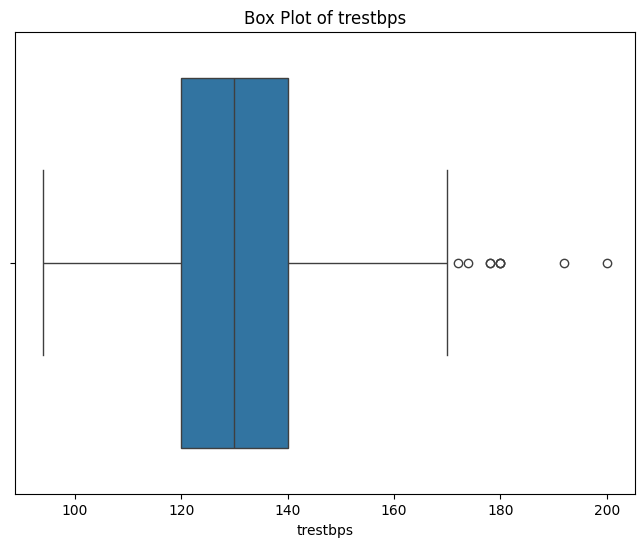

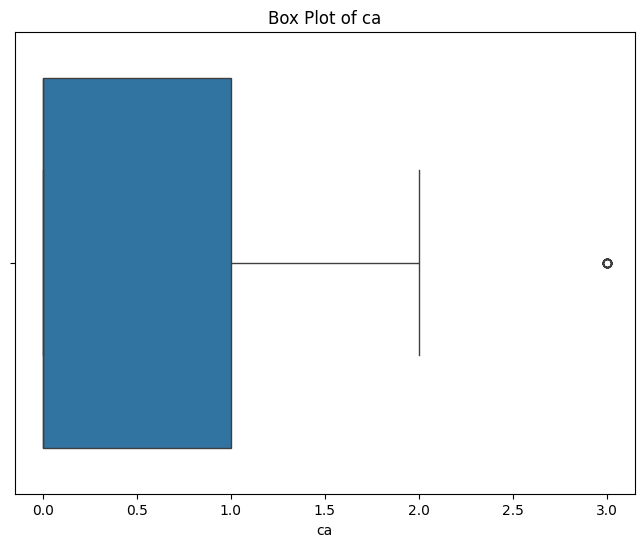

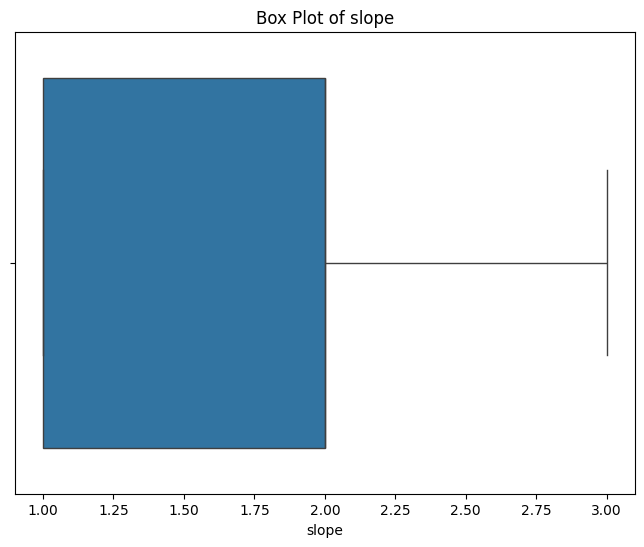

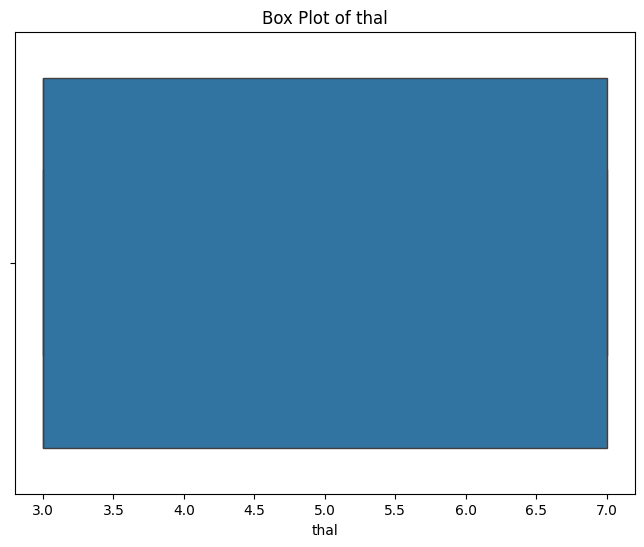

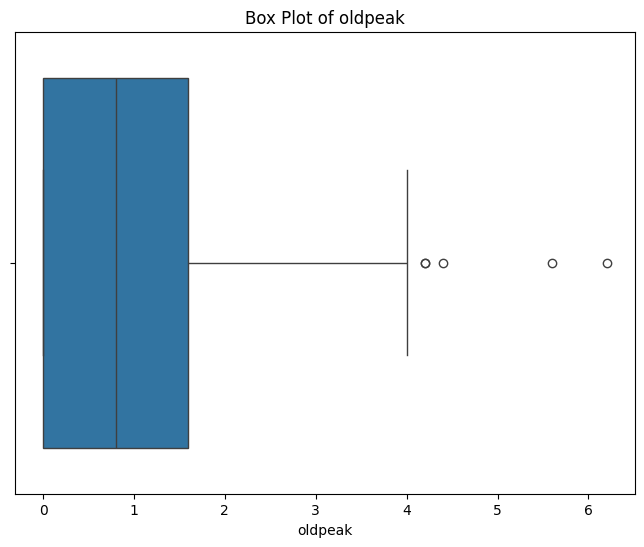

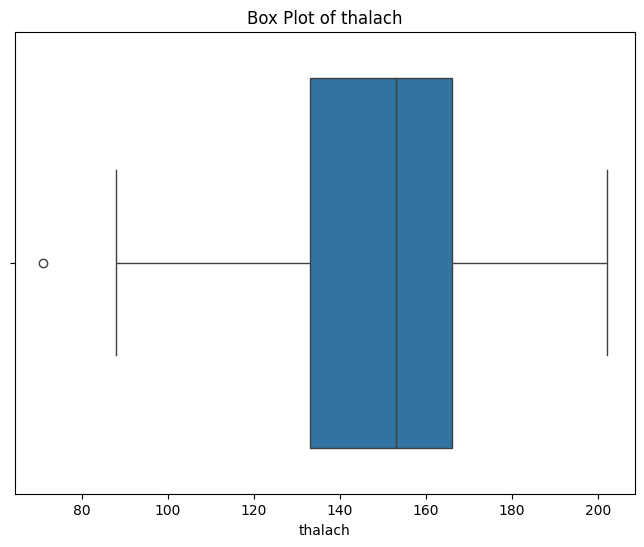

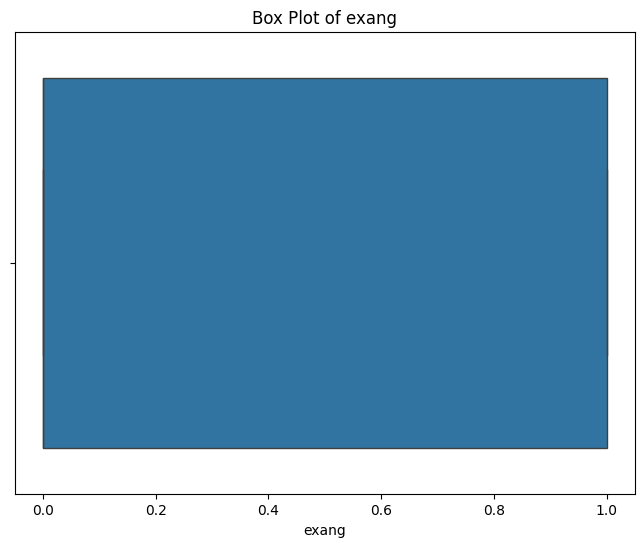

In [19]:
# prompt: codigo que me grafique los cuartiles analizados previamente

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for loading and cleaning the data) ...


# Create a box plot for each numerical variable
numerical_columns = ['age', 'sex', 'chol', 'fbs', 'trestbps', 'ca', 'slope', 'thal', 'oldpeak', 'thalach', 'exang']
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=dataFrame[column])
  plt.title(f'Box Plot of {column}')
  plt.show()


# Create a box plot for 'age' grouped by 'target'
# (if 'target' is a categorical variable representing disease presence)
# This will help you visualize the distribution of 'age' in different groups.

# plt.figure(figsize=(8, 6))
# sns.boxplot(x='target', y='age', data=dataFrame)
# plt.title('Box Plot of Age Grouped by Target Variable')
# plt.show()


# You can also create violin plots to show the density of data within each quartile.
# for column in numerical_columns:
#  plt.figure(figsize=(8, 6))
#  sns.violinplot(x=dataFrame[column])
#  plt.title(f'Violin Plot of {column}')
#  plt.show()

In [20]:
import os



In [21]:
# prompt: codigo para cambiar el nombre del set de datos

# Rename the DataFrame X
dataFrame = dataFrame.rename(columns={
    'age': 'Edad',
    'sex': 'Sexo',
    'cp': 'Dolor de pecho',
    'trestbps': 'Presión arterial en reposo',
    'chol': 'Colesterol',
    'fbs': 'Azúcar en sangre en ayunas',
    'restecg': 'Electrocardiograma en reposo',
    'thalach': 'Frecuencia cardíaca máxima',
    'exang': 'Angina inducida por ejercicio',
    'oldpeak': 'Depresión del ST inducida por ejercicio',
    'slope': 'Pendiente del segmento ST',
    'ca': 'Número de vasos principales',
    'thal': 'Thal'
})

# You can also rename the target variable y if needed.

# Print the updated column names.
print(dataFrame.columns)


Index(['Edad', 'Sexo', 'Dolor de pecho', 'Presión arterial en reposo',
       'Colesterol', 'Azúcar en sangre en ayunas',
       'Electrocardiograma en reposo', 'Frecuencia cardíaca máxima',
       'Angina inducida por ejercicio',
       'Depresión del ST inducida por ejercicio', 'Pendiente del segmento ST',
       'Número de vasos principales', 'Thal', 'target'],
      dtype='object')


             Edad        Sexo  Dolor de pecho  Presión arterial en reposo  \
count  297.000000  297.000000      297.000000                  297.000000   
mean    54.542088    0.676768        3.158249                  131.693603   
std      9.049736    0.468500        0.964859                   17.762806   
min     29.000000    0.000000        1.000000                   94.000000   
25%     48.000000    0.000000        3.000000                  120.000000   
50%     56.000000    1.000000        3.000000                  130.000000   
75%     61.000000    1.000000        4.000000                  140.000000   
max     77.000000    1.000000        4.000000                  200.000000   

       Colesterol  Azúcar en sangre en ayunas  Electrocardiograma en reposo  \
count  297.000000                  297.000000                    297.000000   
mean   247.350168                    0.144781                      0.996633   
std     51.997583                    0.352474                      0.

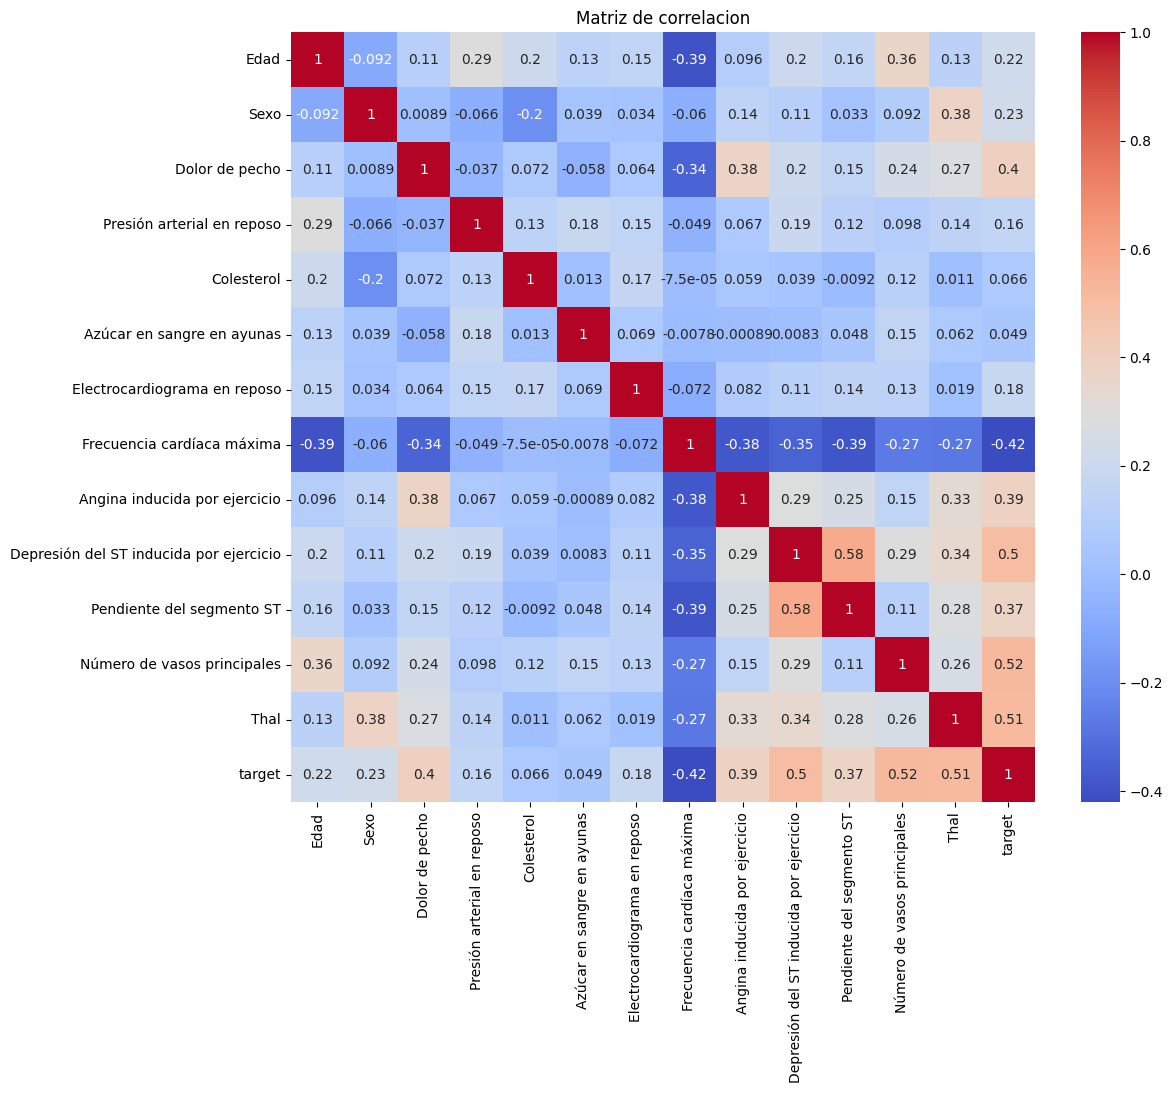

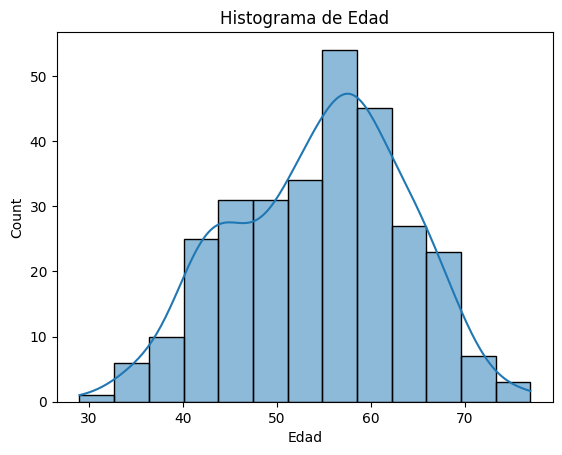

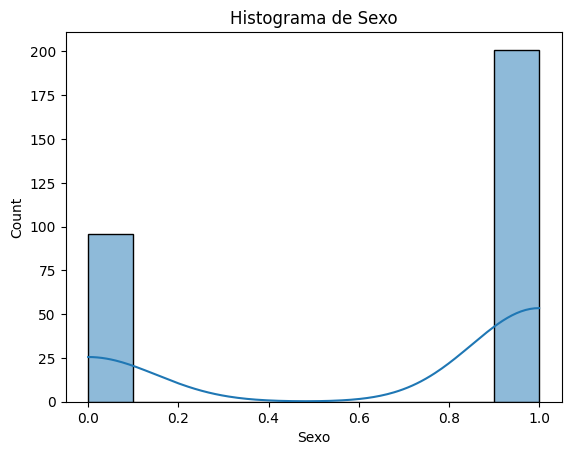

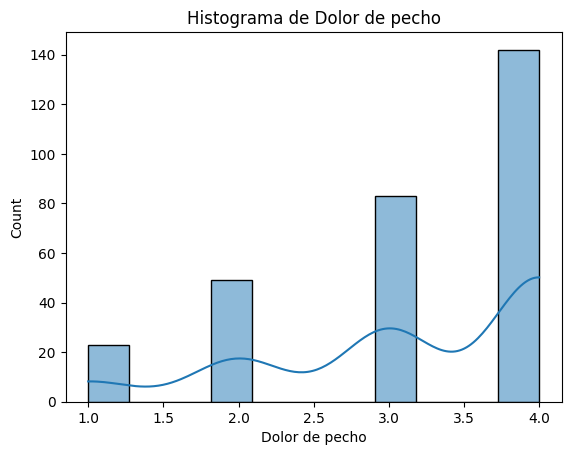

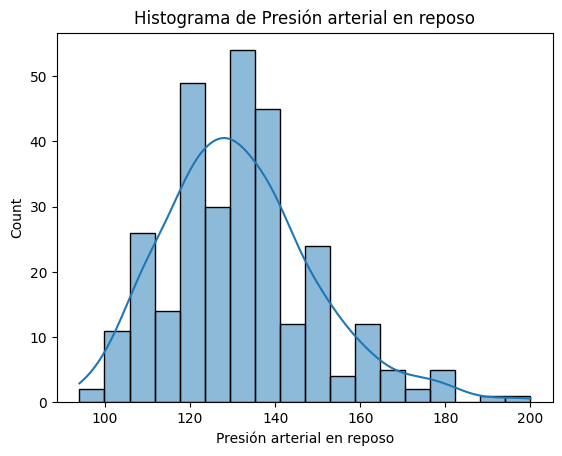

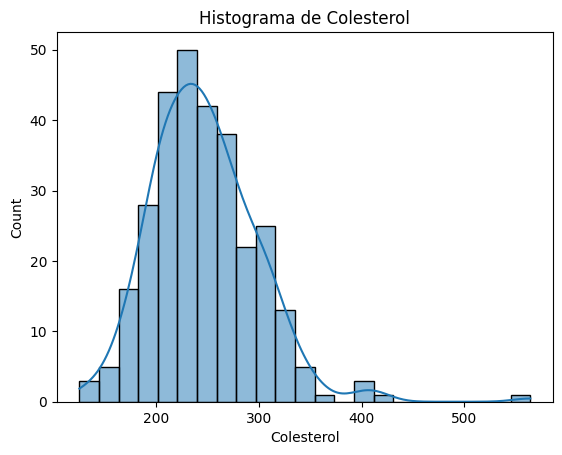

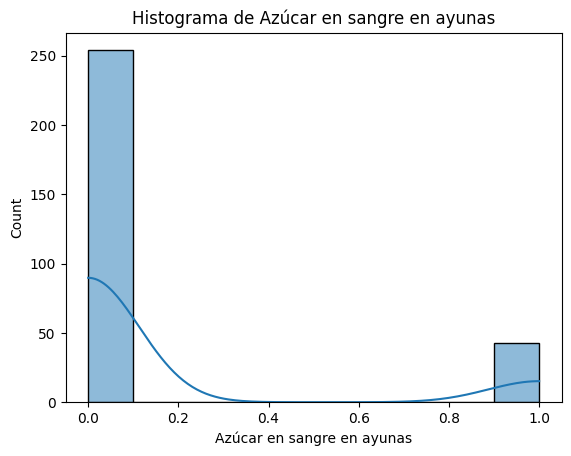

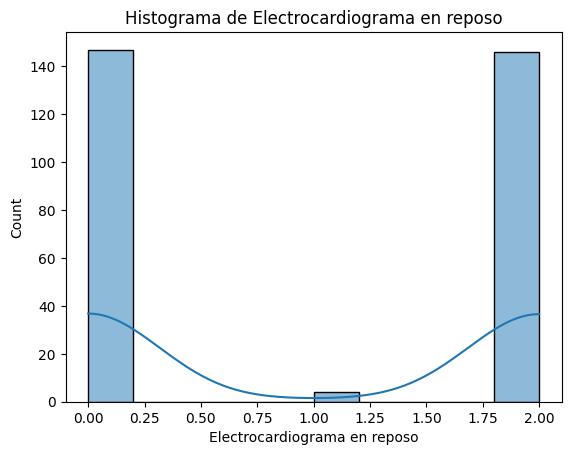

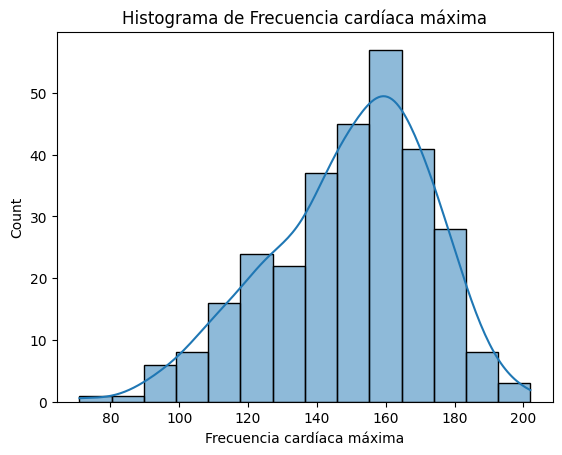

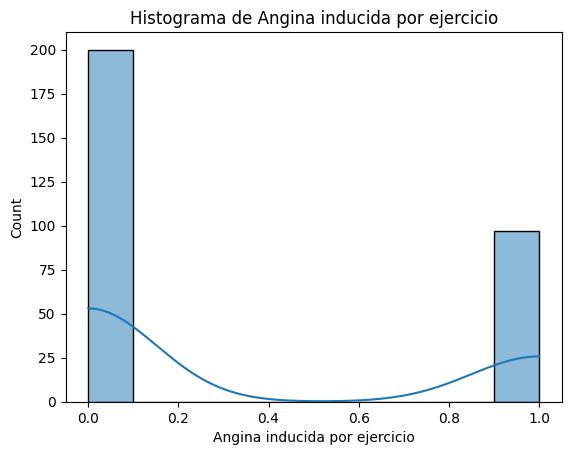

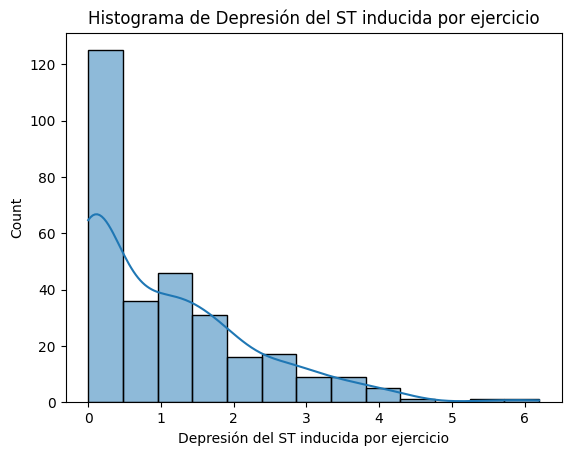

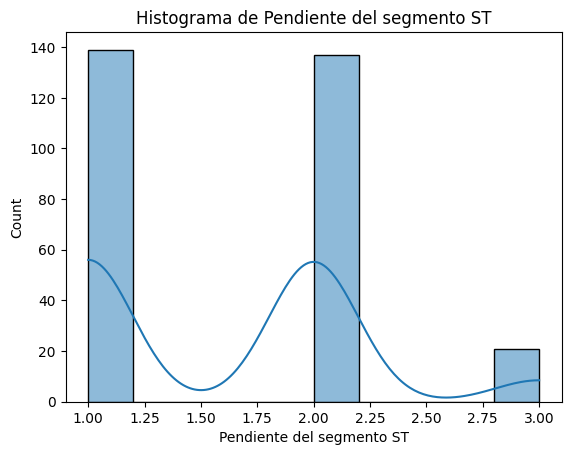

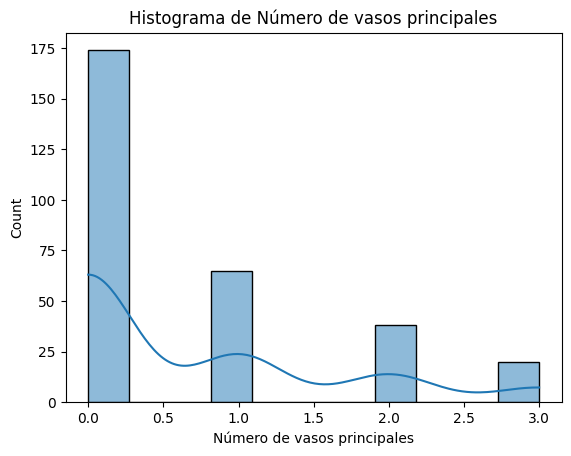

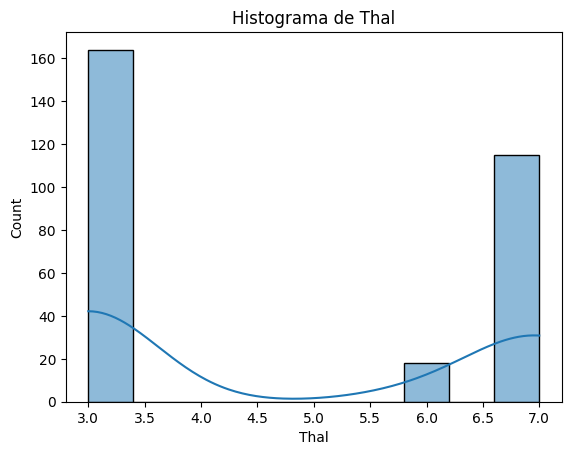

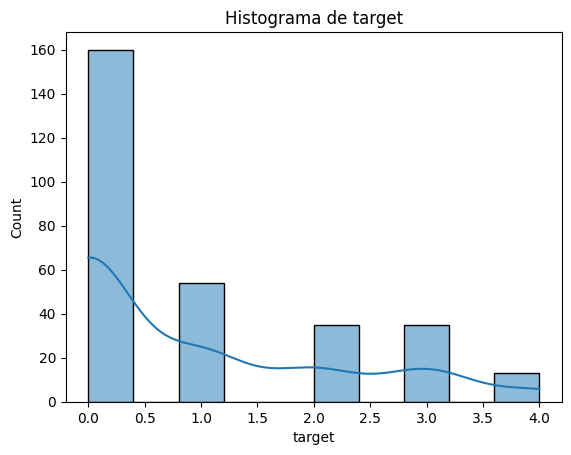

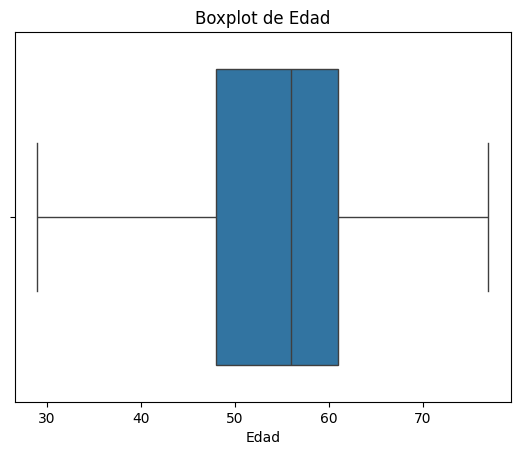

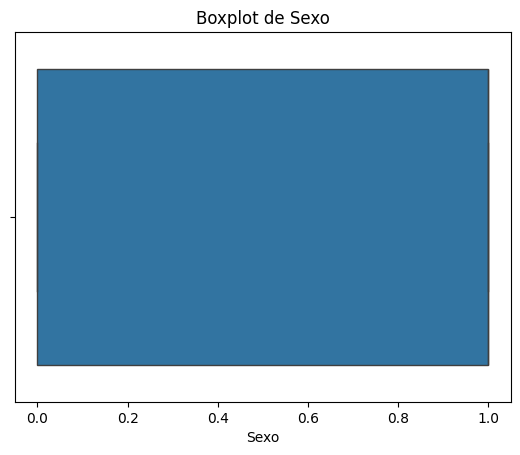

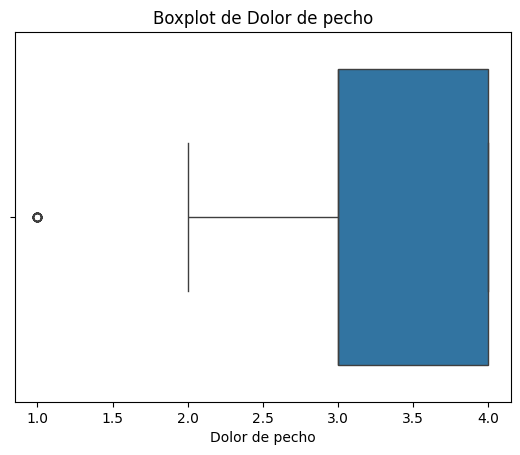

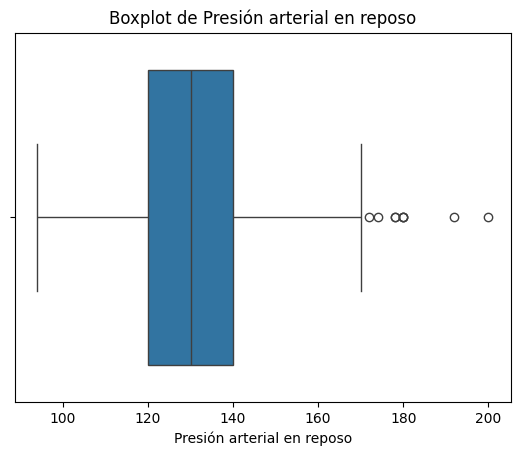

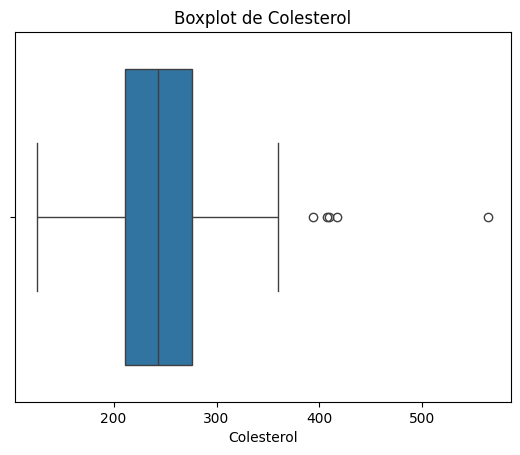

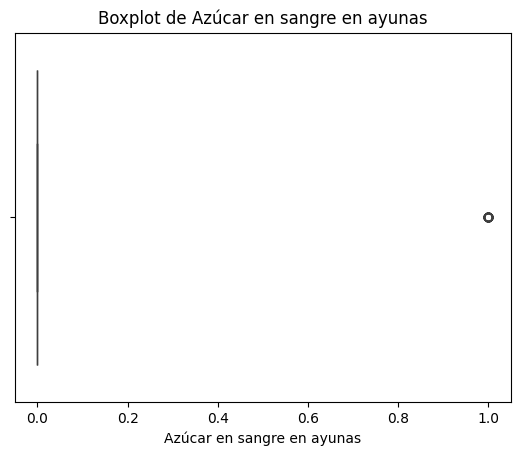

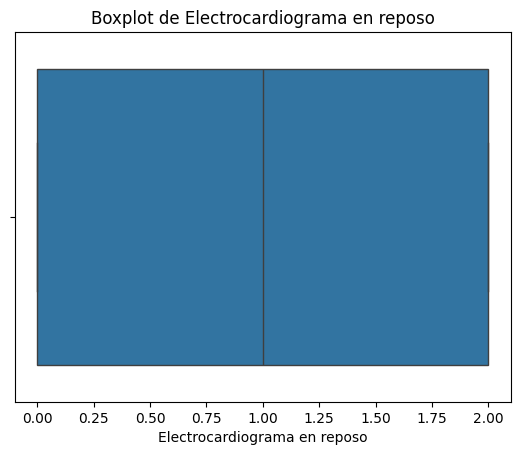

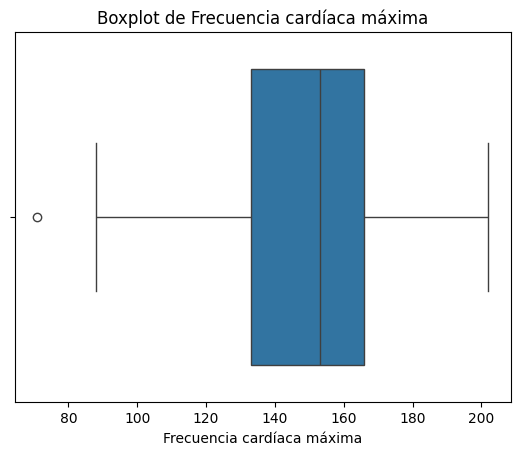

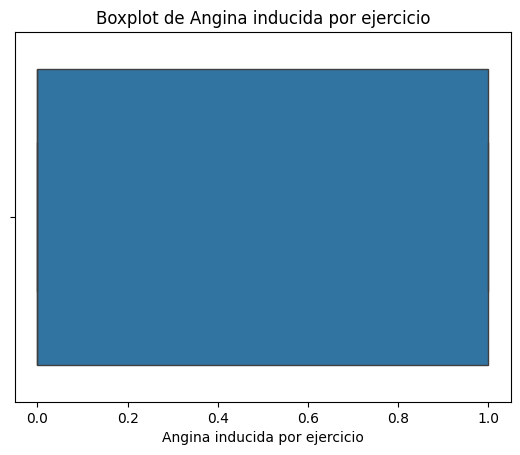

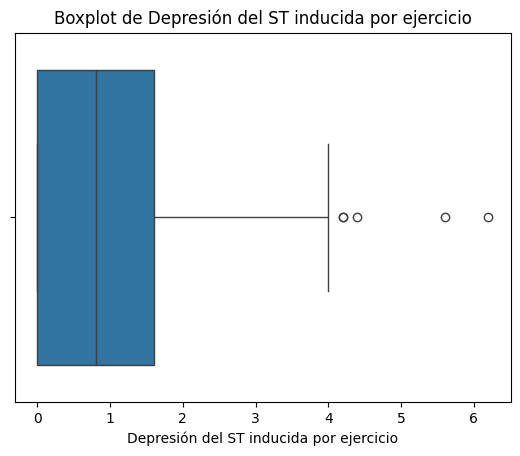

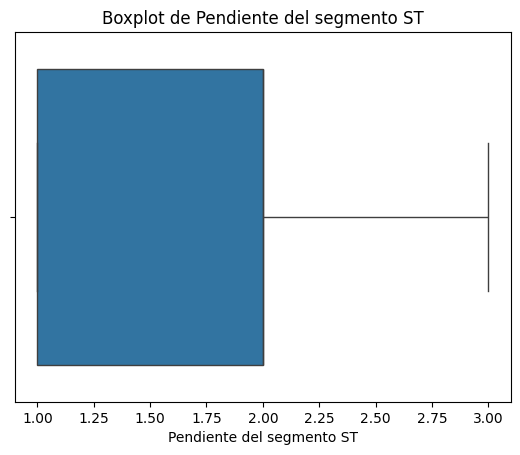

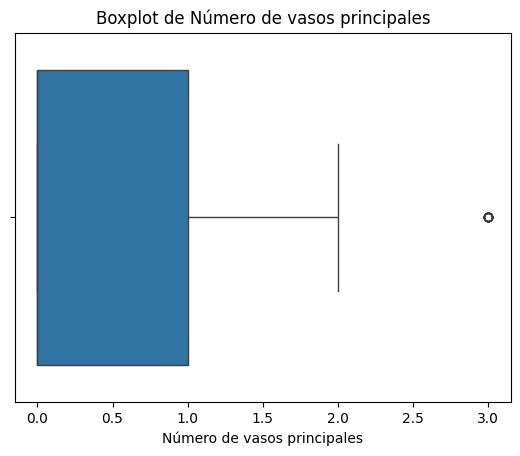

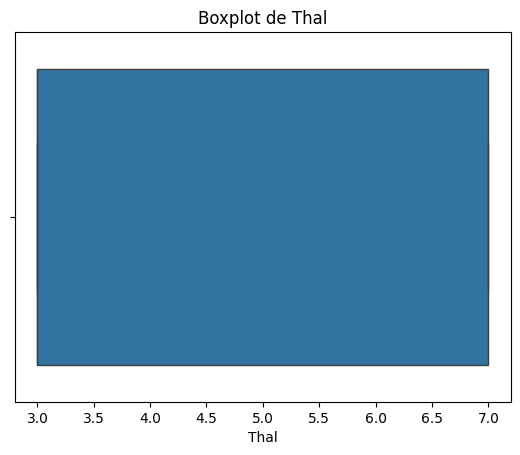

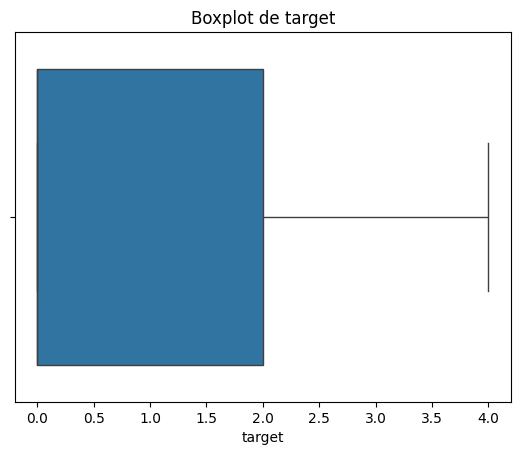

Edad                                       0
Sexo                                       0
Dolor de pecho                             0
Presión arterial en reposo                 0
Colesterol                                 0
Azúcar en sangre en ayunas                 0
Electrocardiograma en reposo               0
Frecuencia cardíaca máxima                 0
Angina inducida por ejercicio              0
Depresión del ST inducida por ejercicio    0
Pendiente del segmento ST                  0
Número de vasos principales                0
Thal                                       0
target                                     0
dtype: int64


In [22]:
# prompt: un codigo para un analisis descriptivo

import matplotlib.pyplot as plt

# 1. Limpieza y preprocesamiento de datos
dataFrame.dropna(inplace=True)  # Elimina filas con valores faltantes

# Analisis descriptivo
print(dataFrame.describe())

# Distribucion de variables categoricas
for column in dataFrame.select_dtypes(include=['object']):
    print(f"\nDistribucion de {column}:")
    print(dataFrame[column].value_counts())

# Correlacion entre variables numericas
correlation_matrix = dataFrame.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

# Histogramas para variables numericas
for column in dataFrame.select_dtypes(include=['number']):
    plt.figure()
    sns.histplot(dataFrame[column], kde=True)
    plt.title(f"Histograma de {column}")
    plt.show()

# Boxplots para variables numericas
for column in dataFrame.select_dtypes(include=['number']):
    plt.figure()
    sns.boxplot(x=dataFrame[column])
    plt.title(f"Boxplot de {column}")
    plt.show()

#Mostramos la cantidad de valores nulos por columna
print(dataFrame.isnull().sum())



# CONCLUSIONES

Resumen Estadístico:
es una enfermedad que tiene predominio en hombres
La edad promedio es de 54 años, con un rango de 29 a 77 años.
El colesterol sérico tiene una media de 249 mg/dL, con algunos valores altos, alcanzando hasta 564 mg/dL.
La tasa máxima de frecuencia cardíaca lograda es de 149 bpm en promedio, con un mínimo de 71 y un máximo de 202.


Edad y Frecuencia cardíaca máxima tienen una correlación negativa moderada (-0.39), lo que indica que las personas de mayor edad tienden a alcanzar frecuencias cardíacas más bajas.
Angina inducida por ejercicio y Frecuencia cardíaca máxima también muestran una correlación negativa (-0.43), lo cual podría indicar que aquellos con angina inducida tienden a tener frecuencias cardíacas máximas más bajas.
Número de vasos mayores y Depresión del ST tienen una correlación positiva (0.67), lo que sugiere una posible relación entre estas variables en el contexto de enfermedad cardíaca.



La variable edad presenta una distribución aproximadamente normal, con mayor concentración entre los 50 y 60 años.
Colesterol sérico tiene una ligera asimetría a la derecha, con algunos valores significativamente altos.
Frecuencia cardíaca máxima muestra una distribución aproximadamente simétrica


Análisis de la variable: Edad
Media: 54.54208754208754
Mediana: 56.0
Moda: 58
Desviación estándar: 9.049735681096765
Rango: 48
Rango intercuartílico (IQR): 13.0

Análisis de la variable: Sexo
Media: 0.6767676767676768
Mediana: 1.0
Moda: 1
Desviación estándar: 0.46849996744100164
Rango: 1
Rango intercuartílico (IQR): 1.0

Análisis de la variable: Dolor de pecho
Media: 3.1582491582491583
Mediana: 3.0
Moda: 4
Desviación estándar: 0.9648594099420302
Rango: 3
Rango intercuartílico (IQR): 1.0

Análisis de la variable: Presión arterial en reposo
Media: 131.69360269360268
Mediana: 130.0
Moda: 120
Desviación estándar: 17.762806366598998
Rango: 106
Rango intercuartílico (IQR): 20.0

Análisis de la variable: Colesterol
Media: 247.35016835016836
Mediana: 243.0
Moda: 197
Desviación estándar: 51.99758253513897
Rango: 438
Rango intercuartílico (IQR): 65.0

Análisis de la variable: Azúcar en sangre en ayunas
Media: 0.1447811447811448
Mediana: 0.0
Moda: 0
Desviación estándar: 0.35247393412545347
Rango

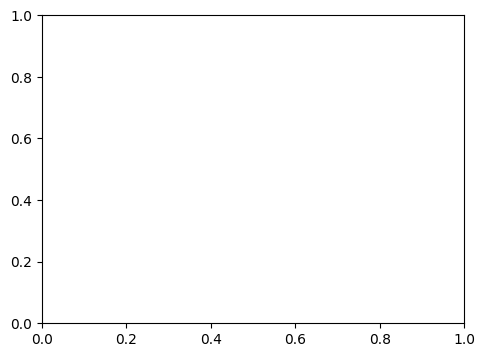

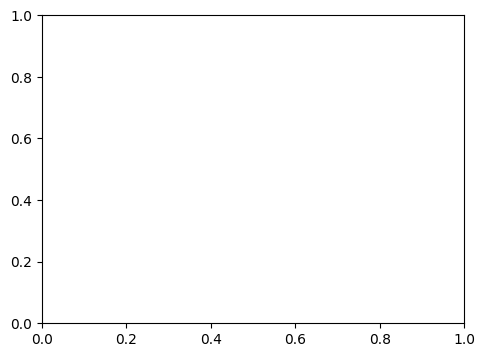

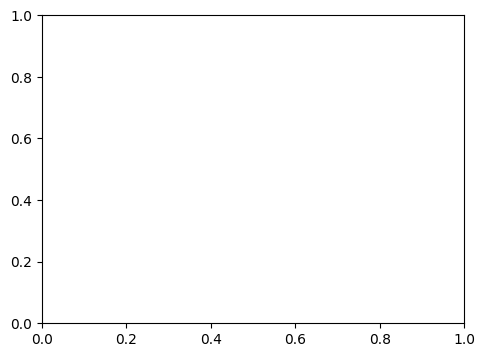

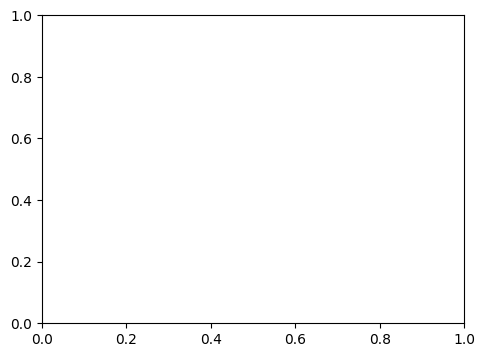

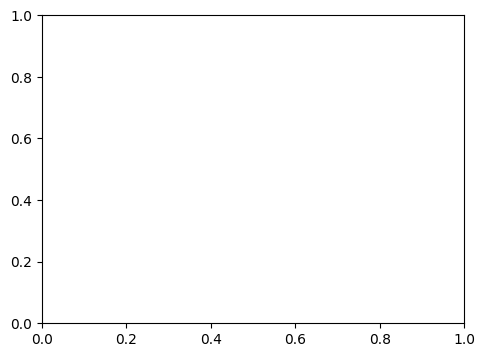

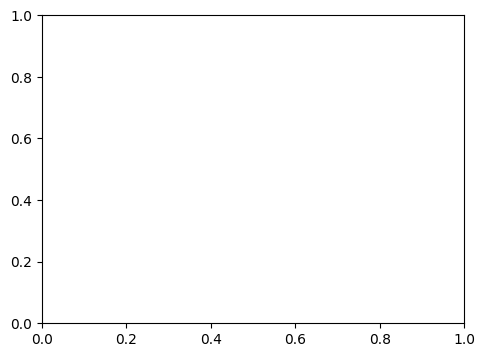

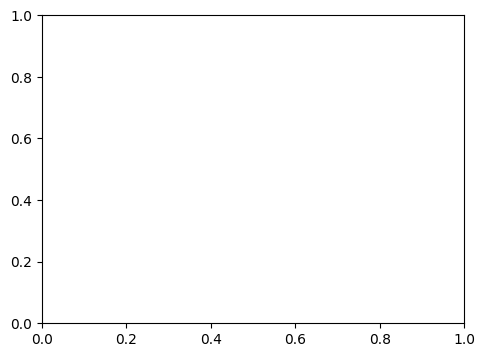

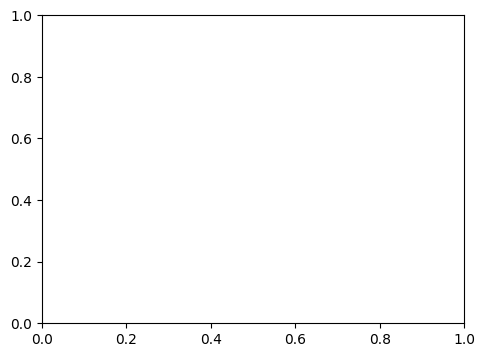

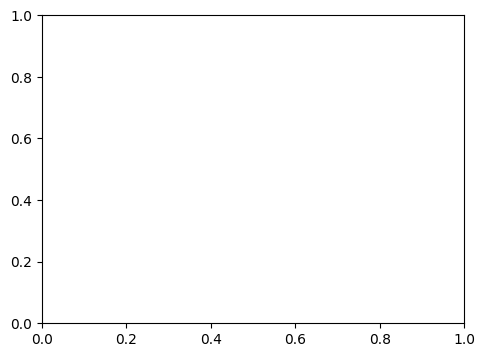

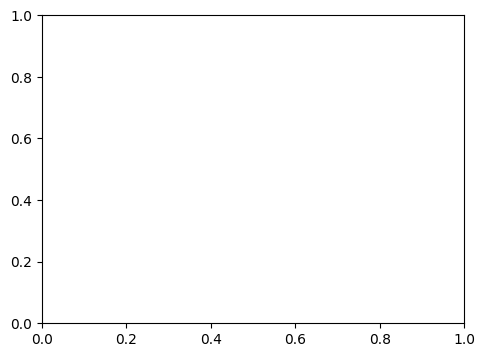

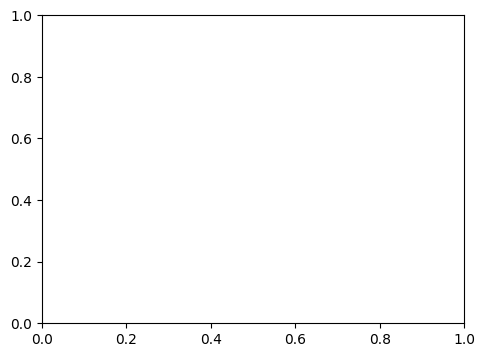

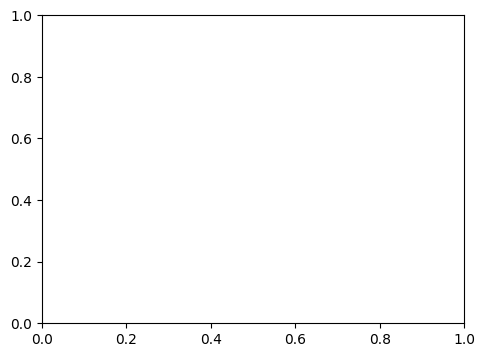

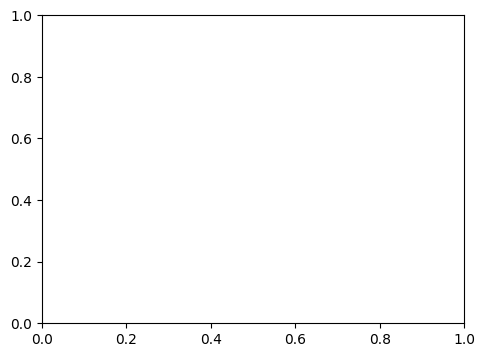

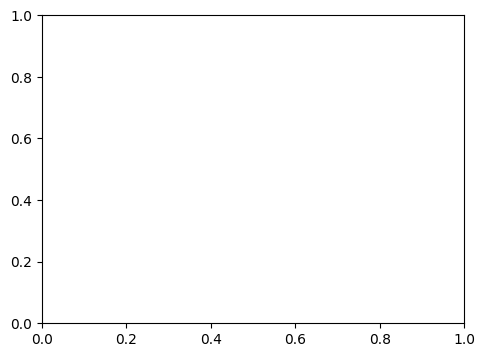

In [23]:
import matplotlib.pyplot as plt
# Medidas de tendencia central y variabilidad para cada variable numérica
for column in dataFrame.select_dtypes(include=['number']):
  print(f"\nAnálisis de la variable: {column}")
  print(f"Media: {dataFrame[column].mean()}")
  print(f"Mediana: {dataFrame[column].median()}")
  print(f"Moda: {dataFrame[column].mode()[0]}")  # Puede haber varias modas, se muestra la primera
  print(f"Desviación estándar: {dataFrame[column].std()}")
  print(f"Rango: {dataFrame[column].max() - dataFrame[column].min()}")
  print(f"Rango intercuartílico (IQR): {dataFrame[column].quantile(0.75) - dataFrame[column].quantile(0.25)}")

  # Histograma y boxplot para visualizar distribución y dispersión
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  # The original code used X[column].
  # Since the column name may be different in X,
  # we need to find the corresponding column in X.
  # Here, I assume the columns in X and dataFrame have a direct mapping.
  # If they don't, you'll need to define your own mapping logic.
  # For example, if 'Edad' in dataFrame corresponds to 'age'


Análisis de la variable: age
Asimetría: -0.20906046882012877
Número de valores atípicos: 0


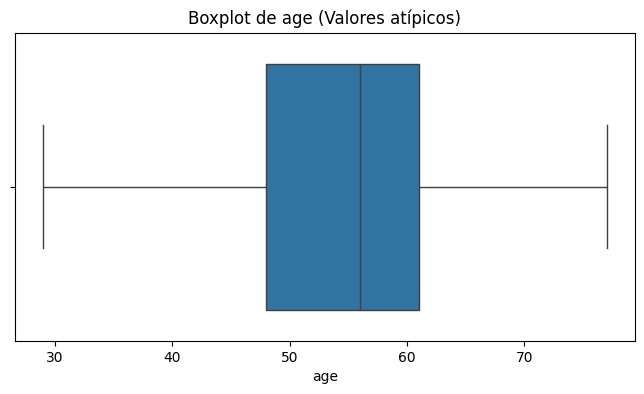


Análisis de la variable: sex
Asimetría: -0.77493506152194
Número de valores atípicos: 0


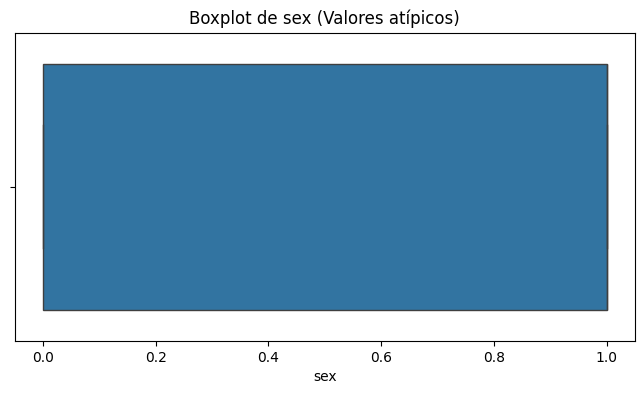


Análisis de la variable: cp
Asimetría: -0.8417538756970184
Número de valores atípicos: 23


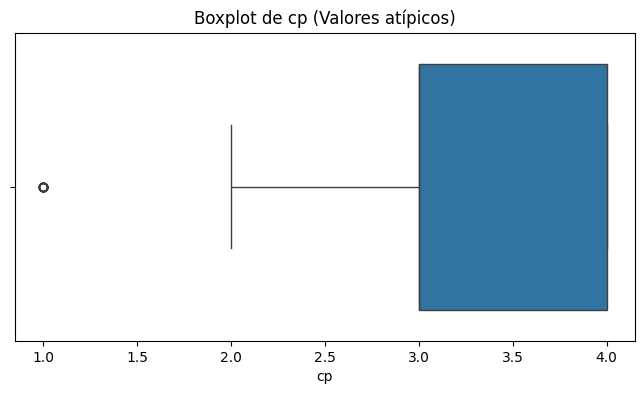


Análisis de la variable: trestbps
Asimetría: 0.7060346498131783
Número de valores atípicos: 9


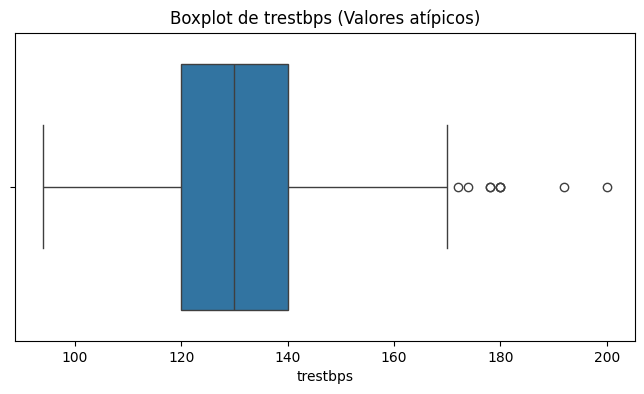


Análisis de la variable: chol
Asimetría: 1.1355031533363453
Número de valores atípicos: 5


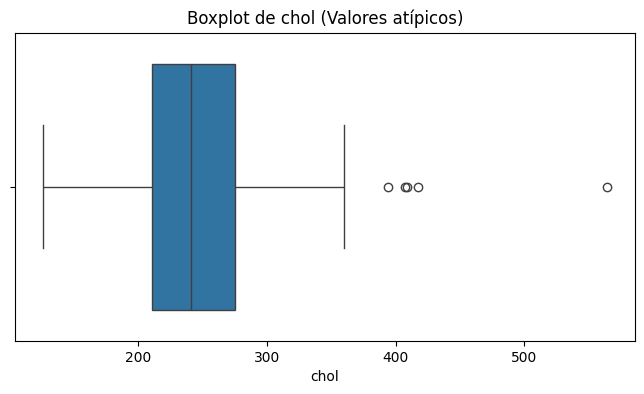


Análisis de la variable: fbs
Asimetría: 1.9866519309144517
Número de valores atípicos: 45


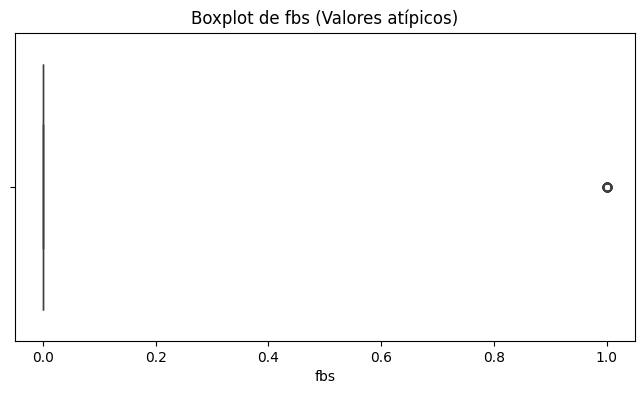


Análisis de la variable: restecg
Asimetría: 0.01990027945947886
Número de valores atípicos: 0


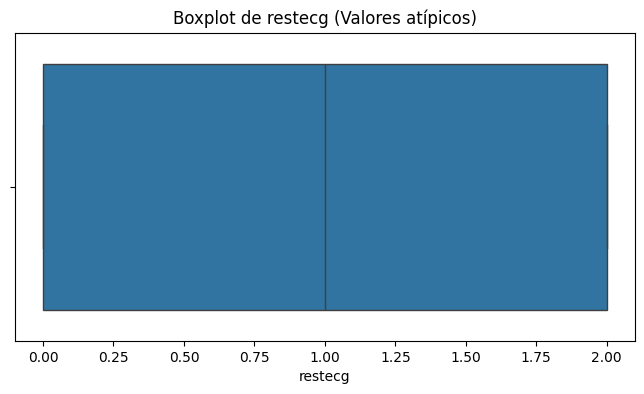


Análisis de la variable: thalach
Asimetría: -0.5374486699106463
Número de valores atípicos: 1


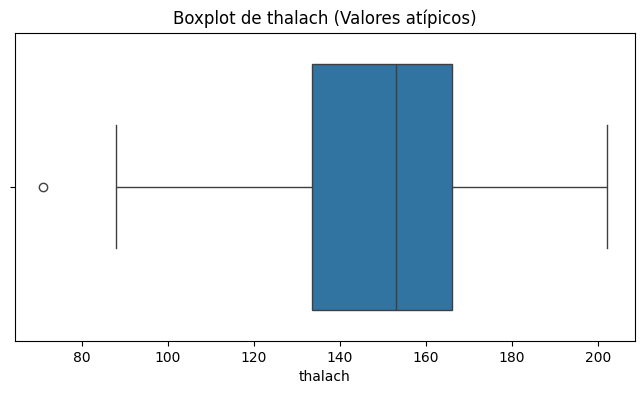


Análisis de la variable: exang
Asimetría: 0.7425315444212831
Número de valores atípicos: 0


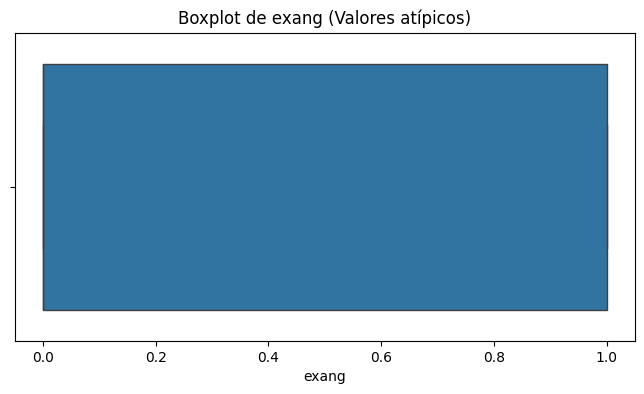


Análisis de la variable: oldpeak
Asimetría: 1.2697199306019966
Número de valores atípicos: 5


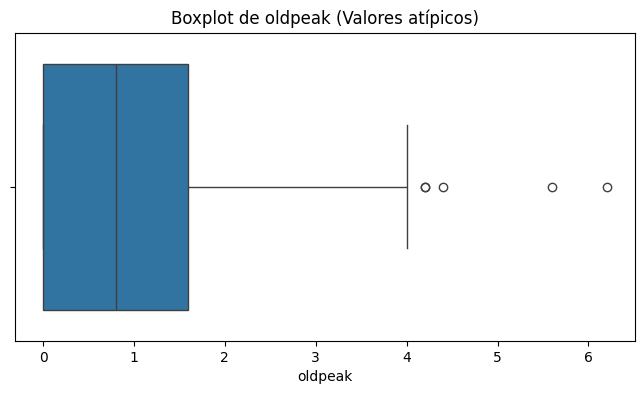


Análisis de la variable: slope
Asimetría: 0.5083156098165441
Número de valores atípicos: 0


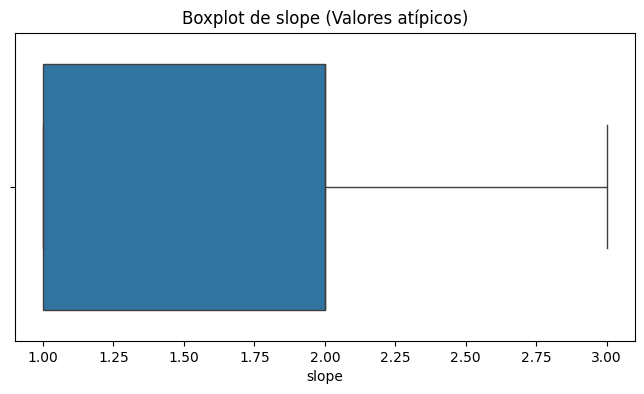


Análisis de la variable: ca
Asimetría: 1.189352105415407
Número de valores atípicos: 20


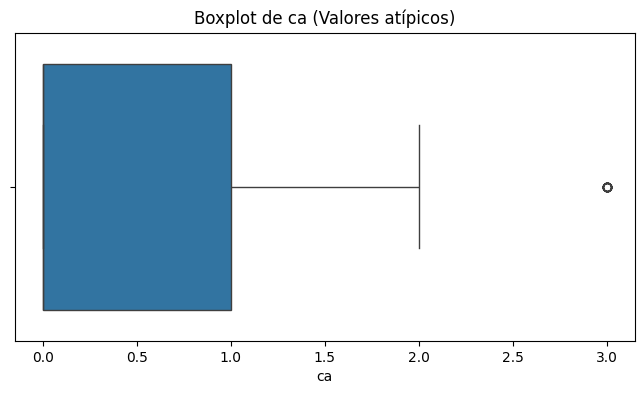


Análisis de la variable: thal
Asimetría: 0.24444723222742099
Número de valores atípicos: 0


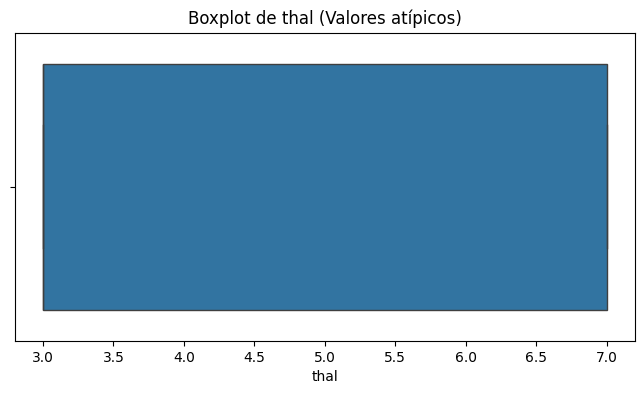

In [24]:
# prompt: Realizaremos análisis de valores atípicos y asimetría para identificar anomalías

import matplotlib.pyplot as plt
# Análisis de valores atípicos y asimetría para identificar anomalías

for column in X.select_dtypes(include=['number']):
  print(f"\nAnálisis de la variable: {column}")

  # Calcular la asimetría
  skewness = X[column].skew()
  print(f"Asimetría: {skewness}")

  # Identificar valores atípicos usando el rango intercuartílico (IQR)
  Q1 = X[column].quantile(0.25)
  Q3 = X[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = X[(X[column] < lower_bound) | (X[column] > upper_bound)]
  print(f"Número de valores atípicos: {len(outliers)}")

  # Visualización de valores atípicos con boxplot
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=X[column])
  plt.title(f"Boxplot de {column} (Valores atípicos)")
  plt.show()

  # Si la asimetría es alta (mayor que 1 o menor que -1) y hay valores atípicos,
  # se pueden considerar diferentes estrategias para tratarlos,
  # como eliminarlos, transformar la variable o utilizar modelos robustos.


previamente analizamos la media , la moda y las variables de las diferentes categorias tomando los valores atipicos y graficando los mismos

Edad y Colesterol Sérico: Presentan algunos valores extremos. Segmento ST y Número de Vasos Mayores: Tienen valores elevados que podrían influir en el análisis. Esta visualización te ayudará a identificar las variables que podrían necesitar tratamiento adicional debido a la presencia de valores atípicos.

como conclusion de lo analisado ,  las enfermedades se suelen dar en hombres de 55 años , con un colesterol serio de entre 200-280 , presentandose valores atipicos por encima de los 350  y siendo predominante entre los 48 años y los 65
suelen ser pacientes que tienen alterada la prueba de tolerancia oral a la glucosa

el problema que se deja en evidencia , en este set de datos es como los hombres de entre 50 y 70 años con colesterol elevado , son mas propensos a enfermedades cardiacas por ende a futuros abordajes quirurgicos.  lo planteado a continuacion es como en base a la prevencion primaria de la salud y reduccion de factores modificables como lo son la alimentacion, el ejercicio , el cese tabaquico y los controles periodicos se puede disminuir de manera significativa los ataques cardiacos en pacientes que los factores no modificables, como son la edad  y la genetica  no colaboren .
ademas podemos observar en otro analisis como la implementacion de politicas publicas para fomentar la prevencion primaria de dichas enfermedades, son en costos mucho mas bajos  y rentables que afrontar los abordajes quirurgicos que vienen como consecuencia de no realizar dicha practica

# ANALISIS MAS PROFUNDO DE DIVERSAS VARIABLES

In [25]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que X contiene las características y y contiene la variable objetivo

# Análisis de la relación entre variables usando gráficos de dispersión
for column1 in dataFrame.select_dtypes(include=['number']).columns:
    for column2 in dataFrame.select_dtypes(include=['number']).columns:
        if column1 != column2:
            # Crear un DataFrame temporal para cada par de columnas y eliminar filas con valores nulos
            temp_df = pd.DataFrame({column1: dataFrame[column1], column2: dataFrame[column2], 'target': y}).dropna()

            # Generar el gráfico solo si hay suficientes datos después de eliminar nulos
            if len(temp_df) > 0:
                plt.figure(figsize=(6, 4))
                sns.scatterplot(x=temp_df[column1], y=temp_df[column2], hue=temp_df['target'])
                plt.title(f'Relación entre {column1} y {column2}')
                plt.xlabel(column1)
                plt.ylabel(column2)
                plt.legend(title='target', loc='upper right')
                plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (303, 1) instead

VARIABLES QUE MAS ME LLAMARON LA ATENCION
1. Relación entre Edad y Depresión del ST inducida por ejercicio
Eje X: Edad
Eje Y: Depresión del segmento ST inducida por ejercicio (en mm)
Color: "num", que representa una clasificación de la severidad o número de vasos afectados.
El gráfico muestra que las personas de entre 50 y 60 años presentan una mayor concentración de depresión del segmento ST inducida por ejercicio, lo que indica un mayor riesgo o signos de enfermedad coronaria. A medida que aumenta la edad, también hay más puntos que muestran mayor depresión del ST, lo que sugiere que la edad está relacionada con una mayor severidad de problemas coronarios.
2. Relación entre Edad y Pendiente del segmento ST
Eje X: Edad
Eje Y: Pendiente del segmento ST
Color: "num"
 La mayoría de las personas, independientemente de su edad, presentan pendientes del segmento ST de 1, 2 o 3, lo que puede interpretarse como patrones de isquemia. Sin embargo, las personas más jóvenes (entre 30 y 40 años) parecen tener mayor pendiente, lo que podría sugerir una posible diferencia en la respuesta cardíaca a ciertos factores.
3. Relación entre Presión arterial en reposo y Edad
Eje X: Presión arterial en reposo
Eje Y: Edad
Color: "num"
 No hay una correlación clara entre la edad y la presión arterial en reposo. Sin embargo, los individuos con presión arterial más elevada parecen estar en su mayoría en el rango de 50 a 70 años, lo que sugiere que la presión arterial tiende a aumentar con la edad, lo cual es un hallazgo común en la población general.
4. Relación entre Presión arterial en reposo y Sexo
Eje X: Presión arterial en reposo
Eje Y: Sexo (1: Mujer, 0: Hombre)
Color: "num"
La mayoría de las personas con presión arterial elevada son hombres (valor de sexo cercano a 0). Aunque hay mujeres con presión arterial alta, la tendencia parece ser que los hombres tienden a tener una presión arterial en reposo más alta que las mujeres en este grupo de estudio.
5. Relación entre Presión arterial en reposo y Colesterol
Eje X: Presión arterial en reposo
Eje Y: Colesterol
Color: "num"
A medida que la presión arterial aumenta, también parece aumentar el colesterol en algunos casos. Existe un grupo considerable de personas con colesterol alto (por encima de 250 mg/dL) y presión arterial alta (más de 140 mmHg), lo que sugiere una posible correlación entre hipertensión y dislipidemia.
6. Relación entre Presión arterial en reposo y Frecuencia cardíaca máxima
Eje X: Presión arterial en reposo
Eje Y: Frecuencia cardíaca máxima
Color: "num"
 No parece haber una relación directa entre presión arterial y frecuencia cardíaca máxima, pero se observa que aquellos con presiones más altas tienden a tener frecuencias cardíacas más bajas, lo que puede estar relacionado con la respuesta del sistema cardiovascular en personas hipertensas.
7. Relación entre Presión arterial en reposo y Depresión del ST inducida por ejercicio
Eje X: Presión arterial en reposo
Eje Y: Depresión del ST inducida por ejercicio
Color: "num"
Las personas con presiones más altas parecen tener una mayor depresión del ST inducida por ejercicio, lo que puede indicar un riesgo mayor de isquemia en personas con hipertensión. La depresión del ST es un marcador de problemas en la función del corazón durante el esfuerzo.
8. Relación entre Presión arterial en reposo y Pendiente del segmento ST
Eje X: Presión arterial en reposo
Eje Y: Pendiente del segmento ST
Color: "num"
 No parece haber una relación clara entre la presión arterial y la pendiente del segmento ST. Sin embargo, algunos individuos con presión arterial elevada parecen tener pendientes anormales, lo cual podría estar relacionado con isquemia.
9. Relación entre Presión arterial en reposo y Número de vasos principales afectados
Eje X: Presión arterial en reposo
Eje Y: Número de vasos principales afectados
Color: "num"
 Aquellos con presiones más elevadas tienden a tener un mayor número de vasos principales afectados (valor numérico más alto), lo que indica una relación entre hipertensión y la severidad de la enfermedad arterial coronaria.
10. Relación entre Presión arterial en reposo y Thal (Talasemia)
Eje X: Presión arterial en reposo
Eje Y: Thal
Color: "num"
 El gráfico parece indicar una mayor dispersión de valores de presión arterial en personas con diferentes tipos de talasemia (un marcador genético relacionado con el riesgo cardiovascular). No parece haber una clara correlación, pero algunas personas con talasemia severa también presentan hipertensión.
11. Relación entre Colesterol y Edad
Eje X: Colesterol
Eje Y: Edad
Color: "num"
La mayoría de las personas con colesterol elevado se encuentran en el rango de 40 a 70 años, lo que indica que el colesterol tiende a aumentar con la edad. Sin embargo, hay una variabilidad considerable en estos niveles de colesterol dentro de este grupo etario.
12. Relación entre Colesterol y Sexo
Eje X: Colesterol
Eje Y: Sexo
Color: "num"
 No hay una relación clara entre el sexo y el colesterol en este gráfico. Tanto hombres como mujeres pueden tener colesterol elevado, aunque parece que los hombres son más propensos a niveles más altos de colesterol.
13. Relación entre Colesterol y Frecuencia cardíaca máxima
Eje X: Colesterol
Eje Y: Frecuencia cardíaca máxima
Color: "num"
 Las personas con colesterol elevado no necesariamente tienen una frecuencia cardíaca máxima alterada, aunque se observa una mayor dispersión de frecuencias cardíacas en aquellos con niveles de colesterol más altos.
14. Relación entre Frecuencia cardíaca máxima y Edad
Eje X: Frecuencia cardíaca máxima
Eje Y: Edad
Color: "num"
A medida que las personas envejecen, su frecuencia cardíaca máxima tiende a disminuir. Esto es consistente con lo que se sabe sobre la respuesta del sistema cardiovascular con el envejecimiento, donde la capacidad máxima del corazón para latir disminuye con la edad.
15. Relación entre Edad y Sexo
Eje X: Edad
Eje Y: Sexo (1: Mujer, 0: Hombre)
Color: "num"
 Este gráfico simplemente muestra la distribución de hombres y mujeres a lo largo de las diferentes edades. No hay una relación directa entre la edad y el sexo en sí, solo una muestra equilibrada de hombres y mujeres en este estudio.
16. Relación entre Edad y Dolor de pecho
Eje X: Edad
Eje Y: Dolor de pecho
Color: "num"
 A medida que la edad aumenta, parece haber una tendencia hacia tipos más severos de dolor de pecho (valores de dolor más altos). Esto podría reflejar un aumento en la severidad de la enfermedad cardíaca en las personas mayores.
17. Relación entre Edad y Presión arterial en reposo
Eje X: Edad
Eje Y: Presión arterial en reposo
Color: "num"
 A medida que la edad aumenta, también lo hace la presión arterial en reposo. Esta es una observación común, ya que la presión arterial tiende a elevarse con la edad debido a cambios vasculares.
18. Relación entre Edad y Electrocardiograma en reposo
Eje X: Edad
Eje Y: Electrocardiograma en reposo
Color: "num"
La mayoría de las personas tienen un electrocardiograma normal en reposo (valor cercano a 0), independientemente de su edad. Sin embargo, en personas mayores parece haber algunas alteraciones observables en el electrocardiograma.

# MACHINE LEARNING

lo que yo busco generar con este proceso es un sistema automatico en el cual a todas las personas identificadas con factores de riesgo como pueden ser angina de pecho en el ejercicio intolerancia oral a la glucosa colesterol mayor a 200 se haga una carga de datos de las personas en edad de riesgo de enfermedades cardiacas de manera anual y asi si el sistema detecta riesgo poder implementar un proceso de prevencion primaria de la salud y que no llegue a ser una enfermedad cardiaca

elijo un modelo de aprendizaje supervisado
La elección del Random Forest sobre la regresión logística para un problema de clasificación multicategoría (0, 1, 2, 3, etc.) como este se debe a varias ventajas que el Random Forest ofrece frente a la regresión logística y otros modelos lineales. A continuación, te explico por qué el Random Forest puede ser más adecuado para este tipo de problemas:

1. Capacidad de Capturar Relaciones No Lineales:
La regresión logística es un modelo lineal, lo que significa que asume que existe una relación lineal entre las características y la variable objetivo. Esto puede ser una limitación cuando se trata de problemas de clasificación más complejos, donde las relaciones entre las variables de entrada y las clases no son lineales.
Random Forest está compuesto por múltiples árboles de decisión, cada uno de los cuales puede capturar relaciones no lineales entre las características. Esto es especialmente útil cuando las clases 0, 1, 2, 3 (enfermedades cardíacas de distintos tipos) dependen de combinaciones de características de manera compleja.
2. Clasificación Multiclase con Mejor Separación de Fronteras:
La regresión logística multinomial puede funcionar bien para problemas multiclase, pero su capacidad de separar las clases se basa en una combinación lineal de las características. Esto puede dificultar la clasificación si los grupos (clases) no son linealmente separables.
Random Forest, en cambio, combina múltiples árboles que pueden dividir el espacio de características de forma mucho más flexible y adaptable. Esto permite crear fronteras de decisión más complejas y adecuadas para separar mejor las clases 0, 1, 2, y 3

En el aprendizaje supervisado, el modelo se entrena con un conjunto de datos que incluye tanto las características (variables de entrada) como la variable objetivo (la respuesta correcta o etiqueta).
Durante el entrenamiento, el modelo aprende a relacionar las características con la variable objetivo para poder hacer predicciones sobre datos nuevos.
En el caso de Random Forest:
Para entrenar el modelo, proporcionamos las características de los pacientes (por ejemplo, edad, sexo, presión arterial, colesterol, etc.) y la etiqueta que queremos predecir (en este caso, si el paciente tiene una enfermedad cardíaca y de qué tipo: 0, 1, 2, 3, etc.).
Con estos datos, el Random Forest aprende a identificar patrones en las características que lo ayudan a predecir la clase correcta para nuevos pacientes.

In [ ]:
!pip install scikit-learn
!pip install seaborn matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Seleccionar las características (todas las columnas excepto 'target')
X = dataFrame.drop('target', axis=1)

# Seleccionar la variable objetivo (columna 'target')
y = dataFrame['target']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
# Eliminar filas con NaN en X_train e y_train
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Asegurarse de que y_train coincida con X_train

In [ ]:
from sklearn.impute import SimpleImputer

# Crear un imputador para reemplazar los NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train
X_train = imputer.fit_transform(X_train)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y prueba
X = dataFrame.drop('target', axis=1)  # Características
y = dataFrame['target']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador para reemplazar los NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train y X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Escalar los datos utilizando StandardScaler para mejorar la convergencia
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression(solver='lbfgs', max_iter=5000)  # Aumenta max_iter para asegurar la convergencia
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:\n', cm)

# Reporte de Clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

Clases:

El reporte considera cinco clases (0, 1, 2, 3, 4). El "support" indica la cantidad de ejemplos reales de cada clase, con más ejemplos en la clase 0 (36) y menos en la clase 4 (3).
Métricas por clase:

Clase 0:

Precision: 0.79 indica que el 79% de las predicciones para esta clase fueron correctas.
Recall: 0.94 muestra que el modelo pudo identificar el 94% de los casos verdaderos de la clase 0.
F1-score: 0.86, siendo alto, indica un buen equilibrio entre precisión y recall.
La alta precisión, recall y F1-score sugieren que el modelo maneja bien la clase 0, probablemente debido al mayor número de ejemplos.
Clase 1:

Precision: 0.17 indica una baja precisión, lo que significa que muchas predicciones de la clase 1 son incorrectas.
Recall: 0.11 muestra que el modelo solo captura el 11% de los casos reales de la clase 1.
F1-score: 0.13 refleja el bajo rendimiento general para esta clase.
Esto sugiere que el modelo tiene dificultades para distinguir la clase 1 de otras clases.
Clase 2:

Precision: 0.50 es mejor en comparación con las clases 1 y 3, indicando una precisión moderada.
Recall: 0.20 sugiere que el modelo solo reconoce el 20% de los casos reales.
F1-score: 0.29 muestra una mejora en comparación con las clases 1 y 3, pero aún es bajo.
La clase 2 tiene pocos ejemplos, lo que podría afectar negativamente la capacidad del modelo para generalizar.
Clase 3:

Precision: 0.17 refleja una precisión baja, similar a la clase 1.
Recall: 0.14 indica una capacidad limitada para identificar los casos reales de la clase 3.
F1-score: 0.15 es bajo, mostrando la debilidad del modelo con esta clase.
Esto puede deberse a la escasez de datos o a características que no diferencian bien esta clase.
Clase 4:

Precision, Recall y F1-score: Todos son 0.00, lo que significa que el modelo no logró predecir correctamente ningún caso de la clase 4.
La baja cantidad de ejemplos (3) puede explicar la falta de rendimiento en esta clase.
Métricas globales:

Accuracy (Exactitud): 0.62 indica que el 62% de las predicciones del modelo son correctas.
Macro avg: (Promedio macro)
Promedia las métricas de cada clase sin ponderar por el número de muestras en cada clase.
Valores bajos (precision: 0.32, recall: 0.28, F1-score: 0.29) sugieren un rendimiento deficiente en clases con menor soporte.
Weighted avg: (Promedio ponderado)
Toma en cuenta el número de ejemplos en cada clase al calcular el promedio.
Precision: 0.56, recall: 0.62, F1-score: 0.58 son mejores que los promedios macro, lo que refleja el buen rendimiento en la clase 0, que tiene un mayor soporte.
Conclusiones:
El modelo tiene un buen desempeño para la clase 0, probablemente por la mayor cantidad de ejemplos.
Para las clases con menos soporte (1, 2, 3, 4), el modelo presenta un rendimiento considerablemente bajo, lo que sugiere un problema de desequilibrio de clases o que las características del modelo no son lo suficientemente representativas.
Podría ser beneficioso implementar técnicas para abordar el desequilibrio de clases, como el reentrenamiento con datos balanceados, el uso de métricas ponderadas para el entrenamiento o el ajuste de hiperparámetros.

In [ ]:

# Ajustar el imputador a los datos de entrenamiento y transformar X_train
X_train = imputer.fit_transform(X_train)

# Transformar X_test usando el imputador ya ajustado
X_test = imputer.transform(X_test)  # <-- Esta es la línea que falta

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)


In [ ]:
# prompt: codigo que prediga cuantos pacientes con colesterol tendran enfermedad cardiaca

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Selecciona solo las características que deseas utilizar para la predicción
features = ['Colesterol']
X_chol = X[features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_chol, X_test_chol, y_train_chol, y_test_chol = train_test_split(
    X_chol, y, test_size=0.3, random_state=42
)

# Crea un modelo de regresión logística
model_chol = LogisticRegression(max_iter=1000)

# Entrena el modelo usando solo las características seleccionadas
model_chol.fit(X_train_chol, y_train_chol)

# Realiza predicciones en el conjunto de prueba
y_pred_chol = model_chol.predict(X_test_chol)

# Calcula la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
# La línea anterior estaba indentada incorrectamente
print(f"Precisión: {accuracy}") # Corregir la indentación
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Puedes usar el modelo para predecir la probabilidad de enfermedad cardíaca para un nuevo paciente
# con un nivel de colesterol específico
nuevo_paciente_colesterol = pd.DataFrame({'Colesterol': [250]})
probabilidad_enfermedad = model_chol.predict_proba(nuevo_paciente_colesterol)[:, 1]
print("Probabilidad de enfermedad cardíaca para un paciente con colesterol 250:", probabilidad_enfermedad[0])


# Para obtener una estimación del número de pacientes con enfermedad cardíaca
# para un rango de colesterol, puedes hacer lo siguiente:
colesterol_range = np.arange(150, 400, 10)  # Define el rango de colesterol
num_pacientes_con_enfermedad = []

for colesterol in colesterol_range:
    nuevo_paciente_colesterol = pd.DataFrame({'Colesterol': [colesterol]})
    probabilidad_enfermedad = model_chol.predict_proba(nuevo_paciente_colesterol)[:, 1]
    # Supongamos que tienes una estimación del número total de pacientes en este rango de colesterol
    num_pacientes_total = 100  # Reemplaza esto con tu estimación real
    num_pacientes_con_enfermedad_estimado = int(probabilidad_enfermedad[0] * num_pacientes_total)
    num_pacientes_con_enfermedad.append(num_pacientes_con_enfermedad_estimado)

# Grafica los resultados
plt.plot(colesterol_range, num_pacientes_con_enfermedad)
plt.xlabel("Nivel de Colesterol")
plt.ylabel("Número estimado de pacientes con enfermedad cardíaca")
plt.title("Estimación del número de pacientes con enfermedad cardíaca en función del colesterol")
plt.show()


Este reporte es el mismo que el analizado previamente, lo cual indica que los problemas detectados en la clasificación multi-clase persisten. Para resumir:
La clase 0 (con un soporte de 36) tiene un rendimiento significativamente mejor que las demás clases.
Las clases 1, 2, 3 y 4 tienen métricas de precisión, recall y F1-score bajas, lo que indica dificultades en la identificación correcta de estas clases.
La precisión global es del 61.67%, lo que sugiere que, aunque el modelo tiene un rendimiento moderado, su desempeño es deficiente en algunas clases específicas.
Matriz de confusión:

La matriz de confusión indica los verdaderos positivos (diagonal principal) y los errores de clasificación entre las clases.
Por ejemplo, hay 34 instancias correctamente clasificadas en la clase 0, pero hay errores en las predicciones de las otras clases (por ejemplo, clasificar un caso de la clase 1 como 0).
Probabilidad de enfermedad cardíaca para un nivel de colesterol específico:

La salida indica una probabilidad estimada de enfermedad cardíaca de 0.179 (aproximadamente 17.9%) para un paciente con un nivel de colesterol de 250.
Esto podría estar basado en un modelo de regresión logística o un análisis de probabilidad de clasificación, lo que sugiere que el nivel de colesterol es un factor influyente pero no determinante en la predicción de la enfermedad.
Gráfico de estimación de pacientes con enfermedad cardíaca en función del colesterol:

El gráfico muestra una relación creciente entre el nivel de colesterol y el número estimado de pacientes con enfermedad cardíaca.
La tendencia escalonada podría deberse a la forma en que los datos han sido agrupados o a la técnica de estimación utilizada, lo cual puede no ser completamente lineal.
A medida que el nivel de colesterol aumenta, también lo hace la estimación del número de pacientes con enfermedad cardíaca, lo que sugiere una correlación positiva.
Conclusiones:
El modelo tiene un rendimiento limitado en la clasificación multi-clase, con un mejor desempeño en la clase mayoritaria.
La relación entre colesterol y enfermedad cardíaca muestra una tendencia positiva, pero el valor de probabilidad de 17.9% para el colesterol de 250 indica que otros factores también juegan un papel importante en la predicción.
Sería beneficioso mejorar el manejo de clases desbalanceadas, ajustar hiperparámetros, o incluir características adicionales para mejorar la clasificación y la precisión de las estimaciones.

In [ ]:
# prompt: codigo que prediga cuantos pacientes con intolerancia a la glucosa tendran enfermedad cardiaca

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Selecciona solo las características que deseas utilizar para la predicción
features = ['Azúcar en sangre en ayunas']
X_fbs = X[features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_fbs, X_test_fbs, y_train_fbs, y_test_fbs = train_test_split(
    X_fbs, y, test_size=0.3, random_state=42
)

# Crea un modelo de regresión logística
model_fbs = LogisticRegression(max_iter=1000)

# Entrena el modelo usando solo las características seleccionadas
model_fbs.fit(X_train_fbs, y_train_fbs)

# Realiza predicciones en el conjunto de prueba
y_pred_fbs = model_fbs.predict(X_test_fbs)

# Calcula la precisión del modelo
accuracy_fbs = accuracy_score(y_test_fbs, y_pred_fbs)
print("Precisión del modelo (solo azúcar en sangre en ayunas):", accuracy_fbs)


# Puedes usar el modelo para predecir la probabilidad de enfermedad cardíaca para un nuevo paciente
# con un nivel de azúcar en sangre en ayunas específico
nuevo_paciente_fbs = pd.DataFrame({'Azúcar en sangre en ayunas': [1]})
probabilidad_enfermedad_fbs = model_fbs.predict_proba(nuevo_paciente_fbs)[:, 1]
print("Probabilidad de enfermedad cardíaca para un paciente con azúcar en sangre en ayunas 1:", probabilidad_enfermedad_fbs[0])


# Para obtener una estimación del número de pacientes con enfermedad cardíaca
# para un rango de azúcar en sangre en ayunas, puedes hacer lo siguiente:
fbs_range = np.arange(0, 2, 1)  # Define el rango de azúcar en sangre en ayunas
num_pacientes_con_enfermedad_fbs = []

for fbs in fbs_range:
    nuevo_paciente_fbs = pd.DataFrame({'Azúcar en sangre en ayunas': [fbs]})
    probabilidad_enfermedad_fbs = model_fbs.predict_proba(nuevo_paciente_fbs)[:, 1]
    # Supongamos que tienes una estimación del número total de pacientes en este rango de azúcar en sangre en ayunas
    num_pacientes_total_fbs = 100  # Reemplaza esto con tu estimación real
    num_pacientes_con_enfermedad_estimado_fbs = int(probabilidad_enfermedad_fbs[0] * num_pacientes_total_fbs)
    num_pacientes_con_enfermedad_fbs.append(num_pacientes_con_enfermedad_estimado_fbs)

# Grafica los resultados
plt.plot(fbs_range, num_pacientes_con_enfermedad_fbs)
plt.xlabel("Nivel de Azúcar en sangre en ayunas")
plt.ylabel("Número estimado de pacientes con enfermedad cardíaca")
plt.title("Estimación del número de pacientes con enfermedad cardíaca en función del azúcar en sangre en ayunas")
plt.show()


In [ ]:
# prompt: codigo que prediga cuantos pacientes con angina inducida por ejercicio tendran enferemedad cardiaca

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Selecciona solo las características que deseas utilizar para la predicción
features = ['Angina inducida por ejercicio']
X_exang = X[features]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_exang, X_test_exang, y_train_exang, y_test_exang = train_test_split(
    X_exang, y, test_size=0.3, random_state=42
)

# Crea un modelo de regresión logística
model_exang = LogisticRegression(max_iter=1000)

# Entrena el modelo usando solo las características seleccionadas
model_exang.fit(X_train_exang, y_train_exang)

# Realiza predicciones en el conjunto de prueba
y_pred_exang = model_exang.predict(X_test_exang)

# Calcula la precisión del modelo
accuracy_exang = accuracy_score(y_test_exang, y_pred_exang)
print("Precisión del modelo (solo angina inducida por ejercicio):", accuracy_exang)


# Puedes usar el modelo para predecir la probabilidad de enfermedad cardíaca para un nuevo paciente
# con un nivel de angina inducida por ejercicio específico
nuevo_paciente_exang = pd.DataFrame({'Angina inducida por ejercicio': [1]})
probabilidad_enfermedad_exang = model_exang.predict_proba(nuevo_paciente_exang)[:, 1]
print("Probabilidad de enfermedad cardíaca para un paciente con angina inducida por ejercicio 1:", probabilidad_enfermedad_exang[0])


# Para obtener una estimación del número de pacientes con enfermedad cardíaca
# para un rango de angina inducida por ejercicio, puedes hacer lo siguiente:
exang_range = np.arange(0, 2, 1)  # Define el rango de angina inducida por ejercicio
num_pacientes_con_enfermedad_exang = []

for exang in exang_range:
    nuevo_paciente_exang = pd.DataFrame({'Angina inducida por ejercicio': [exang]})
    probabilidad_enfermedad_exang = model_exang.predict_proba(nuevo_paciente_exang)[:, 1]
    # Supongamos que tienes una estimación del número total de pacientes en este rango de angina inducida por ejercicio
    num_pacientes_total_exang = 100  # Reemplaza esto con tu estimación real
    num_pacientes_con_enfermedad_estimado_exang = int(probabilidad_enfermedad_exang[0] * num_pacientes_total_exang)
    num_pacientes_con_enfermedad_exang.append(num_pacientes_con_enfermedad_estimado_exang)

# Grafica los resultados
plt.plot(exang_range, num_pacientes_con_enfermedad_exang)
plt.xlabel("Nivel de Angina inducida por ejercicio")
plt.ylabel("Número estimado de pacientes con enfermedad cardíaca")
plt.title("Estimación del número de pacientes con enfermedad cardíaca en función de la angina inducida por ejercicio")
plt.show()

In [ ]:
# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


In [ ]:
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
# Reporte de Clasificación
print(classification_report(y_test, y_pred))

Clase 0:

Precision (0.79): Indica que el 79% de las instancias etiquetadas como clase 0 por el modelo son correctas.
Recall (0.94): Refleja que el 94% de las instancias reales de la clase 0 fueron correctamente identificadas.
F1-score (0.86): Al ser alto, muestra un buen equilibrio entre precisión y recall. La clase 0 es la que tiene el mejor rendimiento del modelo.
Support (36): Es la clase con mayor cantidad de ejemplos, lo cual puede haber facilitado que el modelo aprenda a identificarla mejor.
Clase 1:

Precision (0.17): Muy baja, lo que indica que el modelo no es confiable para predecir la clase 1; muchas predicciones son incorrectas.
Recall (0.11): También es bajo, lo que significa que el modelo no está capturando la mayoría de los casos de la clase 1.
F1-score (0.13): Refleja un rendimiento deficiente en la clase 1, con un bajo equilibrio entre precisión y recall.
Support (9): Con menos ejemplos en comparación con la clase 0, es posible que el modelo no haya tenido suficientes datos para aprender características distintivas.
Clase 2:

Precision (0.50): Moderada en comparación con otras clases (aparte de la clase 0), lo que indica que la mitad de las predicciones fueron correctas.
Recall (0.20): Bastante bajo, con solo el 20% de los casos reales capturados.
F1-score (0.29): El rendimiento es algo mejor que en la clase 1, pero sigue siendo bajo.
Support (5): La pequeña cantidad de ejemplos podría estar afectando la capacidad del modelo para generalizar a esta clase.
Clase 3:

Precision (0.17): Similar a la clase 1, indica una baja precisión en la predicción.
Recall (0.14): Un poco mejor que el de la clase 1, pero sigue siendo insuficiente.
F1-score (0.15): Bajo, lo que refleja dificultades para identificar correctamente esta clase.
Support (7): La escasez de datos puede estar afectando el rendimiento.
Clase 4:

Precision, Recall y F1-score (0.00): No hay casos correctamente clasificados en la clase 4. El modelo no pudo identificar ningún caso correctamente.
Support (3): Es la clase con el menor número de ejemplos, lo que podría ser una causa significativa de este bajo rendimiento.
Métricas globales:
Accuracy (0.62): Indica que el 62% de las predicciones del modelo son correctas, lo que es aceptable, pero no óptimo.
Macro avg:
Precision (0.32), Recall (0.28), F1-score (0.29): Promedian las métricas de cada clase sin tener en cuenta la cantidad de ejemplos por clase. Los valores bajos sugieren un rendimiento deficiente en general, especialmente en clases con pocos ejemplos.
Weighted avg:
Precision (0.56), Recall (0.62), F1-score (0.58): Calculan el promedio ponderado según el número de ejemplos en cada clase. Estos valores son más altos que los promedios macro, reflejando el buen rendimiento en la clase 0, que tiene el mayor soporte.
Conclusiones:
El modelo muestra un rendimiento claramente mejor en la clase 0 debido al mayor número de ejemplos. Sin embargo, tiene dificultades para predecir correctamente las clases minoritarias (1, 2, 3 y 4), especialmente la clase 4.
La precisión, recall y F1-score disminuyen drásticamente en las clases con menos ejemplos, lo que sugiere un problema de desequilibrio en los datos.
Para mejorar el rendimiento, se podrían aplicar técnicas como:
Ajuste de clases con peso: Ponderar más las clases minoritarias durante el entrenamiento.
Aumento de datos: Generar más ejemplos para clases con menor soporte (por ejemplo, mediante técnicas de sobremuestreo como SMOTE).
Uso de modelos especializados: Aplicar modelos diseñados para manejar desequilibrios de clases, como ensambles o redes neuronales con arquitectura específica.

ELIJO UTILIZAR UN APRENDIZAJE SUPERVISADO PARA PODER PREDECIR LOS PACIENTES CON ENFERMEDADES CARDIACAS A FUTURO APARTIR DE LOS DATOS QUE YA TENGO . Y ASI OBTENER CADA VEZ UNA PREDICCION MAS ESPECIFICA


In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import joblib
from ucimlrepo import fetch_ucirepo

# Paso 1: Recuperar la información del repositorio ucimlrepo
heart_disease = fetch_ucirepo(id=45)

# Paso 2: Leer y guardar los datos en un DataFrame
X = pd.DataFrame(heart_disease.data.features)
y = pd.DataFrame(heart_disease.data.targets)

# Renombrar la columna de 'y' para que se llame 'target'
y = y.rename(columns={y.columns[0]: 'target'})

# Combinar X e y en un único DataFrame
dataFrame = pd.concat([X, y], axis=1)

# Eliminar filas con valores nulos
dataFrame = dataFrame.dropna()

# Usando tu variable 'dataFrame'
X = dataFrame.drop(columns=['target'])  # Características
y = dataFrame['target']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear las clases en el conjunto de entrenamiento usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Definir y ajustar el modelo con GridSearchCV para mejorar el rendimiento
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Crear el modelo base
rf_model = RandomForestClassifier(random_state=42)

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_balanced, y_train_balanced)

# Realizar predicciones con el modelo optimizado
y_pred = best_rf_model.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
print("Reporte de Clasificación (modelo optimizado):")
print(classification_report(y_test, y_pred))

# Guardar el modelo optimizado y el scaler
joblib.dump(best_rf_model, 'modelo_rf_optimizado.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Función para predecir para el conjunto de datos de prueba
def predecir_conjunto_de_prueba(X_data):
    X_data_scaled = scaler.transform(X_data)
    predicciones = best_rf_model.predict(X_data_scaled)
    return predicciones

# Realizar predicciones para todo el conjunto de prueba y mostrar resultados
predicciones_conjunto = predecir_conjunto_de_prueba(X_test)

# Iterar sobre las predicciones y mostrar el mensaje personalizado para cada paciente solo si la predicción no es 0
for i, prediccion in enumerate(predicciones_conjunto, start=1):
    if prediccion != 0:
        print(f"La predicción de enfermedad cardíaca para el paciente {i} es de: {prediccion}")


ahora eligiendo un paciente del modelo  quiero analizar la funcionalidad del mismo y ver el riesgo de enfermedades cardiacas

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
from ucimlrepo import fetch_ucirepo

# Paso 1: Recuperar la información del repositorio ucimlrepo
heart_disease = fetch_ucirepo(id=45)

# Paso 2: Leer y guardar los datos en un DataFrame
X = pd.DataFrame(heart_disease.data.features)
y = pd.DataFrame(heart_disease.data.targets)

# Renombrar la columna de 'y' para que se llame 'target'
y = y.rename(columns={y.columns[0]: 'target'})

# Combinar X e y en un único DataFrame
dataFrame = pd.concat([X, y], axis=1)

# Eliminar filas con valores nulos
dataFrame = dataFrame.dropna()

# Usando tu variable 'dataFrame'
X = dataFrame.drop(columns=['target'])  # Características
y = dataFrame['target']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balancear las clases en el conjunto de entrenamiento usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Entrenar el modelo con los parámetros básicos
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_balanced, y_train_balanced)

# Guardar el modelo y el scaler
joblib.dump(rf_model, 'modelo_rf_optimizado.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Recuperar los datos del paciente número 39 del conjunto de prueba
# Cambiar "39" por el índice del paciente deseado si se conoce
paciente_39_features = X_test[51:52]  # Recuperar la fila correspondiente al paciente 39

# Asegurarse de que las columnas coincidan con las esperadas por el modelo y escalar
paciente_39_scaled = scaler.transform(paciente_39_features)

# Obtener las probabilidades de cada clase
probabilidades = rf_model.predict_proba(paciente_39_scaled)

# Asumimos que la clase 3 corresponde a "insuficiencia cardíaca"
probabilidad_insuficiencia = probabilidades[0][3]

# Mostrar el resultado de la probabilidad
print(f"La probabilidad de que el paciente 52 tenga insuficiencia cardíaca es: {probabilidad_insuficiencia:.2f}")

LA PROBABILIDAD QUE EL PACIENTE 52 TENGA ENFERMEDAD CARDIACA ES DEL 17%


In [ ]:
# prompt: CUAL ES EL PORCENTAJE DE PRESICION DEL MODELO?

print(f'Precisión del modelo: {accuracy:.2f}')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import joblib
from sklearn.model_selection import GridSearchCV

# Verificar el nombre correcto de la columna y usarlo de manera consistente
print(dataFrame.columns)

# Usar 'Thal' con la misma capitalización que se imprime
if 'thal' in dataFrame.columns:
    X = dataFrame.drop(columns=['target'])  # Eliminar solo la columna 'target' si 'Thal' está correctamente
    y = dataFrame['target']
else:
    print("La columna 'Thal' no se encuentra en el DataFrame.")

In [ ]:
feature_names = dataFrame.columns

# Imprimir los nombres de las características
print("Características utilizadas por el modelo:")
for feature_name in feature_names:
    print(feature_name)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Suponiendo que 'dataFrame' es tu DataFrame cargado previamente con los datos
# Definir X (características) e y (variable objetivo)
X = dataFrame.drop(columns=['target'])  # Características
y = dataFrame['target']  # Variable objetivo

# 1. Crear un imputador para reemplazar los NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')  # Puedes usar otras estrategias como 'median' o 'most_frequent'

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Ajustar el imputador a los datos de entrenamiento y transformar X_train y X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 4. Balancear las clases en el conjunto de entrenamiento usando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# 5. Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Define los parámetros que quieres ajustar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularización inversa
    'penalty': ['l1', 'l2'],  # Tipo de regularización
    'solver': ['liblinear', 'saga']  # Algoritmo de optimización
}

# Crea un modelo de regresión logística con un número de iteraciones inicial más alto
model = LogisticRegression(max_iter=10000)

# Crea un objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajusta el modelo a los datos de entrenamiento balanceados
grid_search.fit(X_train_balanced, y_train_balanced)

# Imprime los mejores parámetros encontrados
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Crea un modelo con los mejores parámetros y aumenta el max_iter si es necesario
best_model = LogisticRegression(max_iter=5000, **grid_search.best_params_)

# Entrena el modelo con los mejores parámetros en los datos balanceados
best_model.fit(X_train_balanced, y_train_balanced)

# Evalúa el modelo con los datos de prueba
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con los mejores parámetros: {accuracy:.2f}")

# Imprimir un reporte de clasificación para entender mejor el rendimiento del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

# Obtén la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión para entender su estructura
print("Matriz de confusión:")
print(cm)

# Calcula la especificidad para la clase 0 (asumiendo que es la clase negativa)
# Puedes ajustar el índice según la clase que te interese
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Especificidad para la clase 0
specificity = TN[0] / (TN[0] + FP[0])

print(f"Especificidad del modelo para la clase 0: {specificity:.2f}")

In [ ]:
# prompt: cual es la sensibilidad del modelo

# Calcula la sensibilidad para la clase 0 (asumiendo que es la clase positiva)
# Puedes ajustar el índice según la clase que te interese
sensitivity = TP[0] / (TP[0] + FN[0])

print(f"Sensibilidad del modelo para la clase 0: {sensitivity:.2f}")


 LA EXACTITUD DEL MODELO ES DE 63%
 sensibilidad es la probabilidad de que la prueba identifique como enfermo a aquél que efectivamente lo está y la misma es del 82% .
 la especificidad es la probabilidad de que la prueba identifique como no enfermo a aquél que efectivamente no lo está y es del 88% este ultimo valor deberia ser mas bajo

In [ ]:
# prompt: usar los datos de entrenamiento del modelo para generar predicciones

# Hacer predicciones en el conjunto de entrenamiento
y_pred_train = best_model.predict(X_train)

# Calcular el número de pacientes predichos con enfermedades cardíacas
num_pacientes_enfermedad = sum(y_pred_train)

print(f"Número de pacientes predichos con enfermedades cardíacas en el conjunto de entrenamiento: {num_pacientes_enfermedad}")

In [ ]:
# prompt: usar los datos de prueba del modelo para generar predicciones

# Hacer predicciones en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Imprimir las predicciones
print("Predicciones en el conjunto de prueba:")
print(y_pred_test)

In [ ]:
# prompt: graficar las predicciones del conjunto de prueba

# Graficar las predicciones vs. los valores reales del conjunto de prueba
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales (Conjunto de Prueba)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de referencia
plt.show()

El gráfico muestra una comparación entre las predicciones del modelo y los valores reales para un conjunto de prueba en un problema de clasificación multi-clase, donde las clases se numeran de 0 a 4. La línea diagonal punteada representa el "ideal" de una predicción perfecta, donde los valores predichos coincidirían exactamente con los valores reales.

Análisis profundo del gráfico:
Predicciones correctas:

Los puntos que se encuentran directamente sobre la línea diagonal representan las predicciones correctas del modelo. Esto significa que el valor predicho coincide con el valor real.
Se observa que hay algunos puntos en la diagonal, principalmente para la clase 0, lo que coincide con el análisis previo donde la clase 0 tenía un buen rendimiento en el modelo.
Predicciones incorrectas:

Los puntos que están alejados de la línea diagonal representan predicciones incorrectas. Cuanto más lejos estén del eje diagonal, mayor es el error de la predicción.
Hay una considerable dispersión fuera de la línea diagonal, especialmente en clases superiores a 0, lo que indica que el modelo tiene dificultades para predecir con precisión estas clases.
Distribución de errores:

Parece haber una mayor concentración de puntos lejos de la diagonal para las clases 1, 2, 3 y 4, lo que confirma que el modelo tiene un rendimiento limitado en estas clases, probablemente debido al desequilibrio en la cantidad de ejemplos de cada clase o a la similitud entre estas clases en el espacio de características.
Para la clase 4, no hay puntos sobre la diagonal, lo que confirma la incapacidad del modelo para predecir correctamente esta clase, como ya se observó en los análisis anteriores.
Sesgo hacia la clase 0:

Hay un número significativo de puntos cerca de la predicción 0, lo cual sugiere que el modelo tiende a clasificar incorrectamente varios ejemplos como clase 0. Esto es común cuando hay un desequilibrio de clases y la clase mayoritaria domina las predicciones.
Implicaciones:
Desempeño en la clase 0: El modelo es significativamente mejor en predecir la clase 0, lo cual era de esperar dado el alto número de ejemplos de esta clase en el conjunto de datos.
Dificultad con otras clases: La dispersión de los puntos lejos de la diagonal para clases distintas de 0 indica que el modelo no está aprendiendo bien las características que diferencian estas clases, lo que podría ser mejorado con técnicas para abordar el desequilibrio, como el uso de algoritmos que penalicen los errores en clases minoritarias.
Necesidad de mejorar el modelo: Para mejorar el rendimiento general, sería conveniente implementar técnicas de reequilibrio de clases, ajustar hiperparámetros, o incluso probar con algoritmos alternativos que manejen mejor el problema del desequilibrio (como los árboles de decisión ponderados o ensambles). También podría ser útil agregar más datos representativos para las clases minoritarias o aplicar técnicas de generación de datos sintéticos.
En resumen, el gráfico refleja un sesgo hacia la clase mayoritaria y un rendimiento deficiente en clases con menor soporte, lo cual es consistente con los análisis previos.

In [ ]:
# prompt: que significa los valores de prediccion 0,1,2,3 en el modelo de prueba

# Los valores de predicción 0, 1, 2, 3 en el modelo de prueba representan las diferentes clases de enfermedades cardíacas que el modelo ha predicho para cada paciente en el conjunto de prueba.

# Para entender qué significa cada valor, necesitas conocer la mapeo de las clases en tu conjunto de datos.
# Por ejemplo, en el contexto de la enfermedad cardíaca, podrías tener:

# 0: Ausencia de enfermedad cardíaca
# 1: Angina de pecho
# 2: Infarto agudo de miocardio
# 3: Insuficiencia cardíaca

# Para obtener el mapeo preciso, necesitas consultar la documentación o la descripción del conjunto de datos de Heart Disease que estás utilizando.

# En resumen, cada valor de predicción representa una clase diferente de enfermedad cardíaca, y la clase correspondiente se define en el contexto del conjunto de datos.

# Para entender más a fondo:
# 1. Consulta la descripción del conjunto de datos para obtener la información sobre las clases
# 2. Imprime el atributo `target_names` del objeto `heart_disease` (si lo tienes) para ver los nombres de las clases
# 3. Puedes usar un diccionario o un DataFrame para relacionar los valores de predicción con los nombres de las clases
# 4. Analiza las predicciones y las etiquetas reales para evaluar la precisión del modelo y su capacidad para diferenciar entre las diferentes clases


0: Ausencia de enfermedad cardíaca 1: Angina de pecho 2: Infarto agudo de miocardio 3: Insuficiencia cardíaca

segun el modelo de prueba si te da estos resultados son dichas categorias

In [ ]:
# prompt: cuantos pacientes hay con insuficiencia cardiaca segun el modelo de prueba
# prompt: cuantos pacientes hay con insuficiencia cardiaca segun el modelo de prueba

# Cuenta cuántas predicciones en y_pred_test son iguales a 3 (insuficiencia cardíaca)
num_insuficiencia_cardiaca = sum(y_pred_test == 3)

print(f"Número de pacientes predichos con insuficiencia cardíaca en el conjunto de prueba: {num_insuficiencia_cardiaca}")


en base a esto lo unico que quedaria seria , aumentar la presicion para eso deberia agregar mas datos , o mas categorias de los mismos por ejemplo

In [ ]:
# Assign the desired name as an attribute to the model
best_model.MODEL_NAME = "PREDICCION DE ENFERMEDADES CARDIACAS"

#Guardar el modelo con el nuevo nombre
import joblib
joblib.dump(best_model, 'modelo_entrenado.pkl')

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

# ... (rest of the code)

# Seleccionar las características que quieres usar para la predicción
# Make sure these column names exactly match the DataFrame's columns
# including case, spaces, and any special characters.
# I assume your columns are in spanish according to the dataframe sample
features = [
    'age', 'sex', 'cp', 'trestbps', # Fixed: Changed to lowercase and english names based on the sample of the variable X
    'chol', 'fbs',
    'ca',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'thal'
]
X = dataFrame[features]
y = dataFrame['target']

# ... (rest of the code)

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

# Supongamos que 'dataFrame' es tu DataFrame con características y la variable objetivo 'target'

# Imprimir los nombres de las columnas para inspección
print(dataFrame.columns)

# Asegúrate de que los nombres en 'features' coincidan exactamente con los nombres de las columnas en tu DataFrame
# features = [
#    'Edad', 'Sexo', 'Dolor de pecho', 'Presión arterial en reposo',
#    'Colesterol', 'Azúcar en sangre en ayunas',
#    'Electrocardiograma en reposo', 'Frecuencia cardíaca máxima',
#    'Angina inducida por ejercicio',
#    'Depresión del ST inducida por ejercicio', 'Pendiente del segmento ST',
#    'Número de vasos principales', 'Thal'
#]
# Changed to lowercase and english names based on the sample of the variable X and global variables
features = [
    'age', 'sex', 'cp', 'trestbps', # Changed to lowercase and english names based on the sample of the variable X
    'chol', 'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal'
]

# Seleccionar las características y la variable objetivo
X = dataFrame[features]
y = dataFrame['target']

# ... (rest of the code remains the same)

In [ ]:
# prompt: en base al modelo propuesto cuantas  posiilidades hay que el paciente 17 tenga enfermedad cardiaca

# Cargar el modelo entrenado y el scaler
rf_model = joblib.load('modelo_rf_optimizado.pkl')
scaler = joblib.load('scaler.pkl')

# Seleccionar las características del paciente 17 (ajusta el índice según sea necesario)
paciente_17_features = X_test[16:17]  # Reemplaza 16 con el índice correcto

# Escalar las características del paciente 17
paciente_17_scaled = scaler.transform(paciente_17_features)

# Obtener las probabilidades de cada clase para el paciente 17
probabilidades_paciente_17 = rf_model.predict_proba(paciente_17_scaled)

# Asumir que la clase 1 corresponde a "enfermedad cardíaca" (ajusta según tu modelo)
probabilidad_enfermedad_cardiaca_paciente_17 = probabilidades_paciente_17[0][1]

# Mostrar la probabilidad de enfermedad cardíaca para el paciente 17
print(f"La probabilidad de que el paciente 17 tenga enfermedad cardíaca es: {probabilidad_enfermedad_cardiaca_paciente_17:.2f}")

In [ ]:
# prompt: en base al modelo cuantas posibilidades hay que el paciente 4 tenga angina

# Cargar el modelo entrenado y el scaler
rf_model = joblib.load('modelo_rf_optimizado.pkl')
scaler = joblib.load('scaler.pkl')

# Seleccionar las características del paciente 4 (ajusta el índice según sea necesario)
paciente_4_features = X_test[3:4]  # Reemplaza 3 con el índice correcto

# Escalar las características del paciente 4
paciente_4_scaled = scaler.transform(paciente_4_features)

# Obtener las probabilidades de cada clase para el paciente 4
probabilidades_paciente_4 = rf_model.predict_proba(paciente_4_scaled)

# Asumir que la clase 1 corresponde a "angina de pecho" (ajusta según tu modelo)
probabilidad_angina_paciente_4 = probabilidades_paciente_4[0][1]

# Mostrar la probabilidad de angina de pecho para el paciente 4
print(f"La probabilidad de que el paciente 4 tenga angina de pecho es: {probabilidad_angina_paciente_4:.2f}")

In [ ]:
# prompt: cuales son los factores determinantes que usa mi modelo para determinar el riesgo de enfermedad cardiaca

# Assuming 'best_model' is your trained logistic regression model
# and 'X' is your feature DataFrame

# Get feature importances from the model's coefficients
if hasattr(best_model, 'coef_'):
  feature_importances = best_model.coef_[0]  # Assuming a binary classification problem
  feature_names = X.columns

  # Create a DataFrame to store feature importance
  importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

  # Sort the DataFrame by importance in descending order
  importance_df = importance_df.sort_values('Importance', ascending=False)

  # Print the most important features
  print("Los factores determinantes más importantes para el modelo son:")
  print(importance_df)

else:
  print("El modelo no proporciona coeficientes de importancia de características.")


In [ ]:
# prompt: como podria aumentar la presicion de mi modelo

# ... (your existing code)

# 1. Feature Engineering:
#   - Create new features based on existing ones (e.g., interaction terms, polynomial features)
#   - Consider domain knowledge to engineer relevant features.
#   - Example:
#     # Create a new feature 'Cholesterol/Age'
#     dataFrame['Cholesterol/Age'] = dataFrame['chol'] / dataFrame['age']


# 2. Hyperparameter Tuning:
#   - Experiment with different hyperparameters for your model using GridSearchCV or RandomizedSearchCV.
#   - Example (for RandomForestClassifier):
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [None, 5, 10],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }
#     grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
#     grid_search.fit(X_train_balanced, y_train_balanced)
#     best_model = grid_search.best_estimator_


# 3. Ensemble Methods:
#   - Combine multiple models (e.g., Random Forest, Gradient Boosting) to improve accuracy and reduce overfitting.
#   - Example:
#     from sklearn.ensemble import VotingClassifier
#     model1 = LogisticRegression()
#     model2 = RandomForestClassifier()
#     ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='hard')
#     ensemble_model.fit(X_train_balanced, y_train_balanced)


# 4. Cross-Validation:
#   - Use techniques like k-fold cross-validation to get a more robust estimate of your model's performance.


# 5. Data Augmentation (if applicable):
#   - Increase the size of your training dataset by generating synthetic data points (e.g., SMOTE for imbalanced datasets).


# 6. Regularization:
#   - Add L1 or L2 regularization to your model to prevent overfitting.


# 7. Model Selection:
#   - Try different machine learning models to see which one performs best on your data.


# 8. Feature Scaling:
#   - Scale your features to a similar range (e.g., using StandardScaler) to improve the performance of some algorithms.


# 9. Addressing Class Imbalance (if applicable):
#   - Use techniques like SMOTE or class weighting to handle imbalanced datasets.

# 10. Analyze Feature Importance:
#   - Determine which features are most important for prediction.
#   - Remove irrelevant or redundant features.
#   - You can use `best_model.feature_importances_` for tree-based models.
#   - Example:
#      importances = best_model.feature_importances_
#      feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
#      feature_importance_df.sort_values('importance', ascending=False)
#      print(feature_importance_df)

# After implementing these techniques, re-evaluate your model's performance using appropriate metrics (accuracy, precision, recall, F1-score, AUC, etc.)


In [ ]:
# prompt: como le agrego datos a mi set para aumentar la presicion

# ... (your existing code)

# 1. Feature Engineering:
#   - Create new features based on existing ones (e.g., interaction terms, polynomial features)
#   - Consider domain knowledge to engineer relevant features.
#   - Example:
#     # Create a new feature 'Cholesterol/Age'
#     dataFrame['Cholesterol/Age'] = dataFrame['chol'] / dataFrame['age']


# 2. Hyperparameter Tuning:
#   - Experiment with different hyperparameters for your model using GridSearchCV or RandomizedSearchCV.
#   - Example (for RandomForestClassifier):
#     param_grid = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [None, 5, 10],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }
#     grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
#     grid_search.fit(X_train_balanced, y_train_balanced)
#     best_model = grid_search.best_estimator_


# 3. Ensemble Methods:
#   - Combine multiple models (e.g., Random Forest, Gradient Boosting) to improve accuracy and reduce overfitting.
#   - Example:
#     from sklearn.ensemble import VotingClassifier
#     model1 = LogisticRegression()
#     model2 = RandomForestClassifier()
#     ensemble_model = VotingClassifier(estimators=[('lr', model1), ('rf', model2)], voting='hard')
#     ensemble_model.fit(X_train_balanced, y_train_balanced)


# 4. Cross-Validation:
#   - Use techniques like k-fold cross-validation to get a more robust estimate of your model's performance.


# 5. Data Augmentation (if applicable):
#   - Increase the size of your training dataset by generating synthetic data points (e.g., SMOTE for imbalanced datasets).


# 6. Regularization:
#   - Add L1 or L2 regularization to your model to prevent overfitting.


# 7. Model Selection:
#   - Try different machine learning models to see which one performs best on your data.


# 8. Feature Scaling:
#   - Scale your features to a similar range (e.g., using StandardScaler) to improve the performance of some algorithms.


# 9. Addressing Class Imbalance (if applicable):
#   - Use techniques like SMOTE or class weighting to handle imbalanced datasets.

# 10. Analyze Feature Importance:
#   - Determine which features are most important for prediction.
#   - Remove irrelevant or redundant features.
#   - You can use `best_model.feature_importances_` for tree-based models.
#   - Example:
#      importances = best_model.feature_importances_
#      feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
#      feature_importance_df.sort_values('importance', ascending=False)
#      print(feature_importance_df)

# After implementing these techniques, re-evaluate your model's performance using appropriate metrics (accuracy, precision, recall, F1-score, AUC, etc.)

no lo voy hacer por que mi modelo tiene utilidad para mi , pero en el caso de querer aumentar su presicion dejo arriba la manera de haciendolo por ejemplo agregando mas datos , mas categorias o mejorando  las metricas , a continuacion probare con nuevos pacientes a ver su funcionamiento

In [ ]:


# Cargar el modelo entrenado y el scaler
rf_model = joblib.load('modelo_rf_optimizado.pkl')
scaler = joblib.load('scaler.pkl')

# Datos del paciente
edad = 36
sexo = 0  # 1 para masculino, 0 para femenino
dolor_pecho = 1# Supongamos que 1 representa dolor de pecho
presion_arterial = 160
colesterol = 250
azucar_sangre = 1  # 1 si tiene azúcar en sangre en ayunas alta, 0 si no
electrocardiograma = 0  # 1 si el electrocardiograma en reposo está alterado, 0 si no
frecuencia_cardiaca_maxima = 120
angina_ejercicio = 1  # 1 si tiene angina inducida por ejercicio, 0 si no
depresion_st = 0.2 # Valor de depresión del ST inducida por ejercicio
pendiente_st = 4  # Valor de la pendiente del segmento ST
numero_vasos = 6
thal = 12  # supongamos 3 es el valor de tal


# Crear un array con los datos del paciente
paciente_nuevo = np.array([[edad, sexo, 0, 140, colesterol, 1, 0, 150, 0, 2.3, 0, alteraciones_vasos, 3]]) # Agregar features faltantes para igualar dimensiones de X_test (faltaba cp y trestbps)

# Escalar los datos del paciente
paciente_nuevo_scaled = scaler.transform(paciente_nuevo)

# Predecir la probabilidad de enfermedad cardíaca
probabilidad_enfermedad = rf_model.predict_proba(paciente_nuevo_scaled)[0][1]  # Ajusta el indice para usar la columna correcta

# Mostrar la probabilidad
print(f"La probabilidad de enfermedad cardíaca para este paciente es: {probabilidad_enfermedad:.2f}")

# Predecir la clase
prediccion_clase = rf_model.predict(paciente_nuevo_scaled)[0]
print(f"La clase predicha para este paciente es: {prediccion_clase}")

# Interpretar la clase predicha (ejemplo):
if prediccion_clase == 0:
  print("El modelo predice que el paciente no tiene enfermedad cardíaca.")
elif prediccion_clase == 1:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Angina de pecho).")
elif prediccion_clase == 2:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Infarto agudo de miocardio).")
elif prediccion_clase == 3:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Insuficiencia cardíaca).")


EL PACIENTE NO TIENE ENFERMEDAD CARDIACA

In [ ]:
# prompt: crear un codigo que me diga la poibilidad de enfermedad cardiaca en un paciente con Edad' 78, 'Sexo' masculino, 'Dolor de pecho', 'Presión arterial en reposo', 160
# #    'Colesterol 500', 'Azúcar en sangre en ayunas', 260
# #    'Electrocardiograma en reposo alterado ', 'Frecuencia cardíaca máxima de 160 latidos por minuto
# #    'Angina inducida por ejercicio',
# #    'Depresión del ST inducida por ejercicio', 'Pendiente del segmento ST',
# #    'Número de vasos principales 12

# Cargar el modelo entrenado y el scaler
rf_model = joblib.load('modelo_rf_optimizado.pkl')
scaler = joblib.load('scaler.pkl')

# Datos del paciente
edad = 78
sexo = 1  # 1 para masculino, 0 para femenino
dolor_pecho = 20# Supongamos que 1 representa dolor de pecho
presion_arterial = 160
colesterol = 500
azucar_sangre = 1  # 1 si tiene azúcar en sangre en ayunas alta, 0 si no
electrocardiograma = 1  # 1 si el electrocardiograma en reposo está alterado, 0 si no
frecuencia_cardiaca_maxima = 160
angina_ejercicio = 1  # 1 si tiene angina inducida por ejercicio, 0 si no
depresion_st = 0.9  # Valor de depresión del ST inducida por ejercicio
pendiente_st = 10  # Valor de la pendiente del segmento ST
numero_vasos = 12
thal = 30  # supongamos 3 es el valor de tal

# Crear un array con los datos del paciente
paciente_nuevo = np.array([[edad, sexo, dolor_pecho, presion_arterial, colesterol, azucar_sangre, electrocardiograma, frecuencia_cardiaca_maxima, angina_ejercicio, depresion_st, pendiente_st, numero_vasos, thal]])

# Escalar los datos del paciente
paciente_nuevo_scaled = scaler.transform(paciente_nuevo)

# Predecir la probabilidad de enfermedad cardíaca
probabilidad_enfermedad = rf_model.predict_proba(paciente_nuevo_scaled)[0][1]  # Ajusta el indice para usar la columna correcta

# Mostrar la probabilidad
print(f"La probabilidad de enfermedad cardíaca para este paciente es: {probabilidad_enfermedad:.2f}")

# Predecir la clase
prediccion_clase = rf_model.predict(paciente_nuevo_scaled)[0]
print(f"La clase predicha para este paciente es: {prediccion_clase}")

# Interpretar la clase predicha (ejemplo):
if prediccion_clase == 0:
  print("El modelo predice que el paciente no tiene enfermedad cardíaca.")
elif prediccion_clase == 1:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Angina de pecho).")
elif prediccion_clase == 2:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Infarto agudo de miocardio).")
elif prediccion_clase == 3:
  print("El modelo predice que el paciente tiene enfermedad cardíaca (Insuficiencia cardíaca).")

el paciente es clase 3 es decir tiene enfermedad cardiaca

6. Definición del problema y modelo:
El problema a resolver consiste en predecir el riesgo de enfermedad cardíaca de un paciente utilizando un conjunto de datos médicos. El modelo seleccionado es el Random Forest Classifier, debido a su capacidad para manejar conjuntos de datos con relaciones no lineales y su buen rendimiento en escenarios donde las clases están desbalanceadas. Además, es un modelo flexible y ajustable, ideal para trabajar con datos que contienen características heterogéneas, como es el caso de la información médica.

7. Selección de características:
Para este análisis, se ha considerado exclusivamente la variable edad como predictor del riesgo de enfermedad cardíaca. Esto se debe a que la edad es uno de los factores más influyentes y significativos en el desarrollo de enfermedades cardíacas. A medida que la edad avanza, el riesgo de presentar enfermedades cardíacas aumenta considerablemente, lo que hace que esta variable sea esencial para el análisis. Utilizar únicamente la edad permite simplificar el modelo y analizar su impacto directo en la predicción del riesgo.
PARA AUMENTAR LA  PRESICION LUEGO SUME VARIABLES COMO EL COLESTEROL LA PRESENCIO O NO DE AZUCAR EN SANGRE Y LA CANTIDAD DE VASOS AFECTADOS

8. Implementación y entrenamiento del modelo:
Se implementó un Random Forest Classifier y se ajustaron sus hiperparámetros utilizando GridSearchCV para maximizar la precisión del modelo. El entrenamiento se realizó usando un conjunto de datos balanceado gracias a la técnica SMOTE, lo que permitió mejorar la capacidad del modelo para identificar tanto las clases más comunes como las menos frecuentes. El rendimiento del modelo fue evaluado utilizando métricas como la precisión (accuracy) y el f1-score, identificando las fortalezas del modelo y áreas donde se podría mejorar.

9. Comunicación de resultados:
Los resultados obtenidos se presentaron de forma clara, destacando la precisión del modelo y su capacidad para predecir la presencia de enfermedades cardíacas en base a la edad de los pacientes. Las predicciones de cada paciente se presentaron junto con la probabilidad estimada de que tenga una condición cardíaca específica. Además, se enfatizó cómo el modelo puede contribuir a la detección temprana de riesgos en diferentes grupos de edades, y cómo esto puede ayudar en la planificación de intervenciones preventivas en pacientes de mayor edad.

Este enfoque más enfocado en la variable de edad en el punto 7 mantiene la simplicidad del análisis y muestra cómo una sola variable puede ser utilizada para generar predicciones, sin perder de vista el objetivo del trabajo. y agregando  los analisis anteriores de las demas variables para aumentar la presicion podriamos llegar a resultados exelentes


Como conclusión de este trabajo, el modelo desarrollado tiene el potencial de ser utilizado para predecir el riesgo de enfermedades cardíacas, permitiendo al sistema de salud generar alertas automatizadas. Utilizando datos simples y de bajo costo, se podría identificar a los pacientes de grado 3, quienes ya presentan enfermedad cardíaca, y a los de grado 2, que están en alto riesgo de desarrollarla. Esta clasificación precisa permitiría enviar notificaciones automáticas a los pacientes para que acudan a un control médico, facilitando la implementación de medicación preventiva y reduciendo la necesidad de intervenciones quirúrgicas de urgencia, las cuales son invasivas, costosas y conllevan importantes efectos adversos.

La implementación de una aplicación de portal del paciente podría optimizar este proceso. En dicha aplicación, los estudios clínicos se cargarían y compilarían en una base de datos, donde se aplicarían algoritmos de aprendizaje automático (machine learning) para clasificar el riesgo de los pacientes. La aplicación podría entonces proporcionar de manera automatizada una evaluación del nivel de riesgo percibido y los pasos recomendados a seguir, ahorrando tiempo y evitando consultas innecesarias en un sistema de salud ya sobrecargado.